In [151]:
import numpy as np
import pandas as pd
import os
import glob
import random
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf
import scipy.stats as stats
from scipy.io import savemat

In [159]:
data_folder = '/data/tvanasse/nccam3/data/post_process_data/'
from scipy.io import loadmat
annots = loadmat(data_folder + 'spectral_slope_output.mat')

nrem_dataframe = pd.read_csv('nrem_dataframe.csv')

In [160]:
nrem_dataframe["SPECEXP_1-20_ALL"] = np.array(0).astype('object') #create object for 
nrem_dataframe["OBS_1-20"] = np.array(0).astype('object') #create object for 
nrem_dataframe["OBS_1-20_ALL"] = np.array(0).astype('object') #create object for 
nrem_dataframe["FREQ_1-20"] = np.array(0).astype('object') #create object for

nrem_dataframe["SPECEXP_20-40_ALL"] = np.array(0).astype('object') #create object for 
nrem_dataframe["OBS_20-40"] = np.array(0).astype('object') #create object for 
nrem_dataframe["OBS_20-40_ALL"] = np.array(0).astype('object') #create object for 
nrem_dataframe["FREQ_20-40"] = np.array(0).astype('object') #create object for 

nrem_dataframe["SPECEXP_1-40_ALL"] = np.array(0).astype('object') #create object for 
nrem_dataframe["OBS_1-40"] = np.array(0).astype('object') #create object for 
nrem_dataframe["OBS_1-40_ALL"] = np.array(0).astype('object') #create object for 
nrem_dataframe["FREQ_1-40"] = np.array(0).astype('object') #create object for 

# get spectral exponents & set timerange (1 or 2 minutes before awakening)
timerange = 1.0 # minutes before awakening
for i in range(0,annots['output'].shape[1]):
    print(i)
    if (str(annots['output']['freqrange'][0][i][0]) == '[20 40]') & (annots['output']['timerange'][0][i][0][0] == timerange):
        nrem_dataframe.loc[nrem_dataframe[nrem_dataframe["PATH_UNIQUE"] == annots['output']["path"][0][i][0].split("sub-",1)[1]].index.values,"SPECEXP_20-40"] = annots['output']['meanspectralexp'][0][i][0][0]
        nrem_dataframe.at[int(nrem_dataframe[nrem_dataframe["PATH_UNIQUE"] == annots['output']["path"][0][i][0].split("sub-",1)[1]].index.values),"SPECEXP_20-40_ALL"] = annots['output']['spectralexp_all'][0][i][0].tolist()
        nrem_dataframe.at[int(nrem_dataframe[nrem_dataframe["PATH_UNIQUE"] == annots['output']["path"][0][i][0].split("sub-",1)[1]].index.values),"OBS_20-40"] = annots['output']['obs_freq_avg'][0][i][0].tolist()
        nrem_dataframe.at[int(nrem_dataframe[nrem_dataframe["PATH_UNIQUE"] == annots['output']["path"][0][i][0].split("sub-",1)[1]].index.values),"OBS_20-40_ALL"] = annots['output']['obs_freq_all'][0][i][0].tolist()
        nrem_dataframe.at[int(nrem_dataframe[nrem_dataframe["PATH_UNIQUE"] == annots['output']["path"][0][i][0].split("sub-",1)[1]].index.values),"FREQ_20-40"] = annots['output']['freqbins'][0][i][0].tolist()
        
    elif (str(annots['output']['freqrange'][0][i][0]) == '[ 1 40]') & (annots['output']['timerange'][0][i][0][0] == timerange):
        nrem_dataframe.loc[nrem_dataframe[nrem_dataframe["PATH_UNIQUE"] == annots['output']["path"][0][i][0].split("sub-",1)[1]].index.values,"SPECEXP_1-40"] = annots['output']['meanspectralexp'][0][i][0][0]
        nrem_dataframe.at[int(nrem_dataframe[nrem_dataframe["PATH_UNIQUE"] == annots['output']["path"][0][i][0].split("sub-",1)[1]].index.values),"SPECEXP_1-40_ALL"] = annots['output']['spectralexp_all'][0][i][0].tolist()
        nrem_dataframe.at[int(nrem_dataframe[nrem_dataframe["PATH_UNIQUE"] == annots['output']["path"][0][i][0].split("sub-",1)[1]].index.values),"OBS_1-40"] = annots['output']['obs_freq_avg'][0][i][0].tolist()
        nrem_dataframe.at[int(nrem_dataframe[nrem_dataframe["PATH_UNIQUE"] == annots['output']["path"][0][i][0].split("sub-",1)[1]].index.values),"OBS_1-40_ALL"] = annots['output']['obs_freq_all'][0][i][0].tolist()
        nrem_dataframe.at[int(nrem_dataframe[nrem_dataframe["PATH_UNIQUE"] == annots['output']["path"][0][i][0].split("sub-",1)[1]].index.values),"FREQ_1-40"] = annots['output']['freqbins'][0][i][0].tolist()

    elif (str(annots['output']['freqrange'][0][i][0]) == '[ 1 20]') & (annots['output']['timerange'][0][i][0][0] == timerange):
        nrem_dataframe.loc[nrem_dataframe[nrem_dataframe["PATH_UNIQUE"] == annots['output']["path"][0][i][0].split("sub-",1)[1]].index.values,"SPECEXP_1-20"] = annots['output']['meanspectralexp'][0][i][0][0]
        nrem_dataframe.at[int(nrem_dataframe[nrem_dataframe["PATH_UNIQUE"] == annots['output']["path"][0][i][0].split("sub-",1)[1]].index.values),"SPECEXP_1-20_ALL"] = annots['output']['spectralexp_all'][0][i][0].tolist()
        nrem_dataframe.at[int(nrem_dataframe[nrem_dataframe["PATH_UNIQUE"] == annots['output']["path"][0][i][0].split("sub-",1)[1]].index.values),"OBS_1-20"] = annots['output']['obs_freq_avg'][0][i][0].tolist()
        nrem_dataframe.at[int(nrem_dataframe[nrem_dataframe["PATH_UNIQUE"] == annots['output']["path"][0][i][0].split("sub-",1)[1]].index.values),"OBS_1-20_ALL"] = annots['output']['obs_freq_all'][0][i][0].tolist()
        nrem_dataframe.at[int(nrem_dataframe[nrem_dataframe["PATH_UNIQUE"] == annots['output']["path"][0][i][0].split("sub-",1)[1]].index.values),"FREQ_1-20"] = annots['output']['freqbins'][0][i][0].tolist()


0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

1940
1941
1942
1943
1944
1945
1946
1947
1948
1949
1950
1951
1952
1953
1954
1955
1956
1957
1958
1959
1960
1961
1962
1963
1964
1965
1966
1967
1968
1969
1970
1971
1972
1973
1974
1975
1976
1977
1978
1979
1980
1981
1982
1983
1984
1985
1986
1987
1988
1989
1990
1991
1992
1993
1994
1995
1996
1997
1998
1999
2000
2001
2002
2003
2004
2005
2006
2007
2008
2009
2010
2011
2012
2013
2014
2015
2016
2017
2018
2019
2020
2021
2022
2023
2024
2025
2026
2027
2028
2029
2030
2031
2032
2033
2034
2035
2036
2037
2038
2039
2040
2041
2042
2043
2044
2045
2046
2047
2048
2049
2050
2051
2052
2053
2054
2055
2056
2057
2058
2059
2060
2061
2062
2063
2064
2065
2066
2067
2068
2069
2070
2071
2072
2073
2074
2075
2076
2077
2078
2079
2080
2081
2082
2083
2084
2085
2086
2087
2088
2089
2090
2091
2092
2093
2094
2095
2096
2097
2098
2099
2100
2101
2102
2103
2104
2105
2106
2107
2108
2109
2110
2111
2112
2113
2114
2115
2116
2117
2118
2119
2120
2121
2122
2123
2124
2125
2126
2127
2128
2129
2130
2131
2132
2133
2134
2135
2136
2137
2138
2139


3627
3628
3629
3630
3631
3632
3633
3634
3635
3636
3637
3638
3639
3640
3641
3642
3643
3644
3645
3646
3647
3648
3649
3650
3651
3652
3653
3654
3655
3656
3657
3658
3659
3660
3661
3662
3663
3664
3665
3666
3667
3668
3669
3670
3671
3672
3673
3674
3675
3676
3677
3678
3679
3680
3681
3682
3683
3684
3685
3686
3687
3688
3689
3690
3691
3692
3693
3694
3695
3696
3697
3698
3699
3700
3701
3702
3703
3704
3705
3706
3707
3708
3709
3710
3711
3712
3713
3714
3715
3716
3717
3718
3719
3720
3721
3722
3723
3724
3725
3726
3727
3728
3729
3730
3731
3732
3733
3734
3735
3736
3737
3738
3739
3740
3741
3742
3743
3744
3745
3746
3747
3748
3749
3750
3751
3752
3753
3754
3755
3756
3757
3758
3759
3760
3761
3762
3763
3764
3765
3766
3767
3768
3769
3770
3771
3772
3773
3774
3775
3776
3777
3778
3779
3780
3781
3782
3783
3784
3785
3786
3787
3788
3789
3790
3791
3792
3793
3794
3795
3796
3797
3798
3799
3800
3801
3802
3803
3804
3805
3806
3807
3808
3809
3810
3811
3812
3813
3814
3815
3816
3817
3818
3819
3820
3821
3822
3823
3824
3825
3826


5301
5302
5303
5304
5305
5306
5307
5308
5309
5310
5311
5312
5313
5314
5315
5316
5317
5318
5319
5320
5321
5322
5323
5324
5325
5326
5327
5328
5329
5330
5331
5332
5333
5334
5335
5336
5337
5338
5339
5340
5341
5342
5343
5344
5345
5346
5347
5348
5349
5350
5351
5352
5353
5354
5355
5356
5357
5358
5359
5360
5361
5362
5363
5364
5365
5366
5367
5368
5369
5370
5371
5372
5373
5374
5375
5376
5377
5378
5379
5380
5381
5382
5383
5384
5385
5386
5387
5388
5389
5390
5391
5392
5393
5394
5395
5396
5397
5398
5399
5400
5401
5402
5403
5404
5405
5406
5407
5408
5409
5410
5411
5412
5413
5414
5415
5416
5417
5418
5419
5420
5421
5422
5423
5424
5425
5426
5427
5428
5429
5430
5431
5432
5433
5434
5435
5436
5437
5438
5439
5440
5441
5442
5443
5444
5445
5446
5447
5448
5449
5450
5451
5452
5453
5454
5455
5456
5457
5458
5459
5460
5461
5462
5463
5464
5465
5466
5467
5468
5469
5470
5471
5472
5473
5474
5475
5476
5477
5478
5479
5480
5481
5482
5483
5484
5485
5486
5487
5488
5489
5490
5491
5492
5493
5494
5495
5496
5497
5498
5499
5500


### Prepare and save data for snpm (matlab) test

In [119]:
for spec in ["SPECEXP_1-20_ALL","SPECEXP_20-40_ALL", "SPECEXP_1-40_ALL"]:
    print(spec)

    sub_chan = np.vstack(nrem_dataframe[nrem_dataframe["Q1Experience"] == "Report"][spec].values)
    print(sub_chan.shape)
    mdic = {"sub_chan": sub_chan, "label":spec}
    savemat("/data/tvanasse/nccam3/data/post_process_data/specexps/report_" + spec + "_30s.mat", mdic)
    
    sub_chan = np.vstack(nrem_dataframe[nrem_dataframe["Q1Experience"] == "Something"][spec].values)
    print(sub_chan.shape)
    mdic = {"sub_chan": sub_chan, "label":spec}
    savemat("/data/tvanasse/nccam3/data/post_process_data/specexps/something_" + spec + "_30s.mat", mdic)
    
    sub_chan = np.vstack(nrem_dataframe[nrem_dataframe["Q1Experience"] == "NoReport"][spec].values)
    print(sub_chan.shape)
    mdic = {"sub_chan": sub_chan, "label":spec}
    savemat("/data/tvanasse/nccam3/data/post_process_data/specexps/noreport_" + spec + "_30s.mat", mdic)
    
    sub_chan = np.vstack(nrem_dataframe[nrem_dataframe["Q1Experience"] != "NoReport"][spec].values)
    print(sub_chan.shape)
    mdic = {"sub_chan": sub_chan, "label":spec}
    savemat("/data/tvanasse/nccam3/data/post_process_data/specexps/reportsomething_" + spec + "_30s.mat", mdic)
    
    

SPECEXP_1-20_ALL
(284, 185)
(314, 185)
(325, 185)
(599, 185)
SPECEXP_20-40_ALL
(284, 185)
(314, 185)
(325, 185)
(599, 185)
SPECEXP_1-40_ALL
(284, 185)
(314, 185)
(325, 185)
(599, 185)


### Prepare Data by Averaging DE/NE within SUBJECTS

In [31]:
for spec in ["SPECEXP_1-20_ALL","SPECEXP_20-40_ALL", "SPECEXP_1-40_ALL"]:
    
    check = np.load('./sub_q1_data/sub_reportorsomethingandnoreport.npy')
    print(check)

    new = []
    q1 = nrem_dataframe[nrem_dataframe["Q1Experience"] == "Report"]
    for sub in check:
        new.append(np.mean(np.array(q1[q1['ID'] == sub]['SPECEXP_1-40_ALL'].values.tolist()), axis=0))
    print(np.array(new).shape)
    mdic = {"sub_chan": np.array(new), "label":spec}
    savemat("/data/tvanasse/nccam3/data/post_process_data/specexps/reportorsomethingandnoreport/report_" + spec + "_idavg_60s.mat", mdic)
    
    new = []
    q1 = nrem_dataframe[nrem_dataframe["Q1Experience"] == "Something"]
    for sub in check:
        new.append(np.mean(np.array(q1[q1['ID'] == sub]['SPECEXP_1-40_ALL'].values.tolist()), axis=0))
    print(np.array(new).shape)
    mdic = {"sub_chan": np.array(new), "label":spec}
    savemat("/data/tvanasse/nccam3/data/post_process_data/specexps/reportorsomethingandnoreport/something_" + spec + "_idavg_60s.mat", mdic)
    
    new = []
    q1 = nrem_dataframe[nrem_dataframe["Q1Experience"] == "NoReport"]
    for sub in check:
        new.append(np.mean(np.array(q1[q1['ID'] == sub]['SPECEXP_1-40_ALL'].values.tolist()), axis=0))
    print(np.array(new).shape)
    mdic = {"sub_chan": np.array(new), "label":spec}
    savemat("/data/tvanasse/nccam3/data/post_process_data/specexps/reportorsomethingandnoreport/noreport_" + spec + "_idavg_60s.mat", mdic)
        
    new = []
    q1 = nrem_dataframe[nrem_dataframe["Q1Experience"] != "NoReport"]
    for sub in check:
        new.append(np.mean(np.array(q1[q1['ID'] == sub]['SPECEXP_1-40_ALL'].values.tolist()), axis=0))
    print(np.array(new).shape)
    mdic = {"sub_chan": np.array(new), "label":spec}
    savemat("/data/tvanasse/nccam3/data/post_process_data/specexps/reportorsomethingandnoreport/reportsomething_" + spec + "_idavg_60s.mat", mdic)
    


[2000 2001 2002 2004 2005 2006 2008 2009 2010 2011 2012 2016 2019 2020
 2022 2023 2026 2027 2028 2029 2030 2031 2032 2034 2035 2037 2041 2046
 2047 2048 2049 2051 2052 2053 2054 2055 2056 2058 2060 2061 2063 2064
 2065 2066 2067 2068 2069 2070 2071 2073 2075 2078 2079 2080 2083 2084
 2085 2086 2087 2088 2091 2092 2094 2096 2097 2099 2101 2102 2103 2104
 2105 2106 2111 2112 2114 2116 2121 2122 2123 2126 2127 2128 2133 2134
 2140 2142 2144]
(87,)
(87,)
(87, 185)
(87, 185)
[2000 2001 2002 2004 2005 2006 2008 2009 2010 2011 2012 2016 2019 2020
 2022 2023 2026 2027 2028 2029 2030 2031 2032 2034 2035 2037 2041 2046
 2047 2048 2049 2051 2052 2053 2054 2055 2056 2058 2060 2061 2063 2064
 2065 2066 2067 2068 2069 2070 2071 2073 2075 2078 2079 2080 2083 2084
 2085 2086 2087 2088 2091 2092 2094 2096 2097 2099 2101 2102 2103 2104
 2105 2106 2111 2112 2114 2116 2121 2122 2123 2126 2127 2128 2133 2134
 2140 2142 2144]


/home/tvanasse/miniconda/envs/nccam/lib/python3.6/site-packages/numpy/core/fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/tvanasse/miniconda/envs/nccam/lib/python3.6/site-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/tvanasse/miniconda/envs/nccam/lib/python3.6/site-packages/numpy/core/fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/tvanasse/miniconda/envs/nccam/lib/python3.6/site-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/tvanasse/miniconda/envs/nccam/lib/python3.6/site-packages/numpy/core/fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/tvanasse/miniconda/envs/nccam/lib/python3.6/site-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = 

/home/tvanasse/miniconda/envs/nccam/lib/python3.6/site-packages/numpy/core/fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/tvanasse/miniconda/envs/nccam/lib/python3.6/site-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/tvanasse/miniconda/envs/nccam/lib/python3.6/site-packages/numpy/core/fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/tvanasse/miniconda/envs/nccam/lib/python3.6/site-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/tvanasse/miniconda/envs/nccam/lib/python3.6/site-packages/numpy/core/fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/tvanasse/miniconda/envs/nccam/lib/python3.6/site-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = 

(87,)
(87,)
(87, 185)
(87, 185)
[2000 2001 2002 2004 2005 2006 2008 2009 2010 2011 2012 2016 2019 2020
 2022 2023 2026 2027 2028 2029 2030 2031 2032 2034 2035 2037 2041 2046
 2047 2048 2049 2051 2052 2053 2054 2055 2056 2058 2060 2061 2063 2064
 2065 2066 2067 2068 2069 2070 2071 2073 2075 2078 2079 2080 2083 2084
 2085 2086 2087 2088 2091 2092 2094 2096 2097 2099 2101 2102 2103 2104
 2105 2106 2111 2112 2114 2116 2121 2122 2123 2126 2127 2128 2133 2134
 2140 2142 2144]
(87,)
(87,)
(87, 185)
(87, 185)


/home/tvanasse/miniconda/envs/nccam/lib/python3.6/site-packages/numpy/core/fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/tvanasse/miniconda/envs/nccam/lib/python3.6/site-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/tvanasse/miniconda/envs/nccam/lib/python3.6/site-packages/numpy/core/fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/tvanasse/miniconda/envs/nccam/lib/python3.6/site-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/tvanasse/miniconda/envs/nccam/lib/python3.6/site-packages/numpy/core/fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/tvanasse/miniconda/envs/nccam/lib/python3.6/site-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = 

### Prepare Data by Averaging DE/NE within SESSIONS

In [115]:
for spec in ["SPECEXP_1-20_ALL","SPECEXP_20-40_ALL", "SPECEXP_1-40_ALL"]:
    print(spec)

    new = []
    q1 = nrem_dataframe[nrem_dataframe["Q1Experience"] == "Report"]
    for ses in q1["ID_Visit"].unique():
        new.append(np.mean(np.array(q1[q1["ID_Visit"] ==ses]['SPECEXP_1-40_ALL'].values.tolist()), axis=0))
    print(np.array(new).shape)
    mdic = {"sub_chan": np.array(new), "label":spec}
    savemat("/data/tvanasse/nccam3/data/post_process_data/specexps/report_" + spec + "_sesavg_60s.mat", mdic)
    
    new = []
    q1 = nrem_dataframe[nrem_dataframe["Q1Experience"] == "Something"]
    for ses in q1["ID_Visit"].unique():
        new.append(np.mean(np.array(q1[q1["ID_Visit"] ==ses]['SPECEXP_1-40_ALL'].values.tolist()), axis=0))
    print(np.array(new).shape)
    mdic = {"sub_chan": np.array(new), "label":spec}
    savemat("/data/tvanasse/nccam3/data/post_process_data/specexps/something_" + spec + "_sesavg_60s.mat", mdic)
    
    new = []
    q1 = nrem_dataframe[nrem_dataframe["Q1Experience"] == "NoReport"]
    for ses in q1["ID_Visit"].unique():
        new.append(np.mean(np.array(q1[q1["ID_Visit"] ==ses]['SPECEXP_1-40_ALL'].values.tolist()), axis=0))
    print(np.array(new).shape)
    mdic = {"sub_chan": np.array(new), "label":spec}
    savemat("/data/tvanasse/nccam3/data/post_process_data/specexps/noreport_" + spec + "_sesavg_60s.mat", mdic)
        
    new = []
    q1 = nrem_dataframe[nrem_dataframe["Q1Experience"] != "NoReport"]
    for ses in q1["ID_Visit"].unique():
        new.append(np.mean(np.array(q1[q1["ID_Visit"] ==ses]['SPECEXP_1-40_ALL'].values.tolist()), axis=0))
    print(np.array(new).shape)
    mdic = {"sub_chan": np.array(new), "label":spec}
    savemat("/data/tvanasse/nccam3/data/post_process_data/specexps/reportsomething_" + spec + "_sesavg_60s.mat", mdic)
    


SPECEXP_1-20_ALL


KeyError: 'ID_Visit'

### Perform Spectral Exponent Statistical Group Comparison

[2000 2004 2006 2008 2009 2010 2011 2012 2019 2020 2022 2023 2026 2027
 2028 2029 2030 2031 2032 2035 2037 2041 2047 2048 2049 2051 2052 2054
 2055 2058 2060 2061 2063 2064 2065 2066 2067 2068 2069 2070 2071 2073
 2075 2078 2080 2083 2084 2085 2087 2092 2097 2099 2101 2102 2103 2104
 2105 2106 2111 2121 2123 2126 2127 2128 2133 2134 2140 2142 2144]
588
        Mixed Linear Model Regression Results
Model:            MixedLM Dependent Variable: y       
No. Observations: 588     Method:             REML    
No. Groups:       123     Scale:              0.0583  
Min. group size:  1       Log-Likelihood:     -62.7494
Max. group size:  14      Converged:          Yes     
Mean group size:  4.8                                 
------------------------------------------------------
          Coef.  Std.Err.    z     P>|z| [0.025 0.975]
------------------------------------------------------
Intercept -2.036    0.020 -102.712 0.000 -2.075 -1.997
Q1_DUMMY   0.041    0.022    1.883 0.060 -0.002  

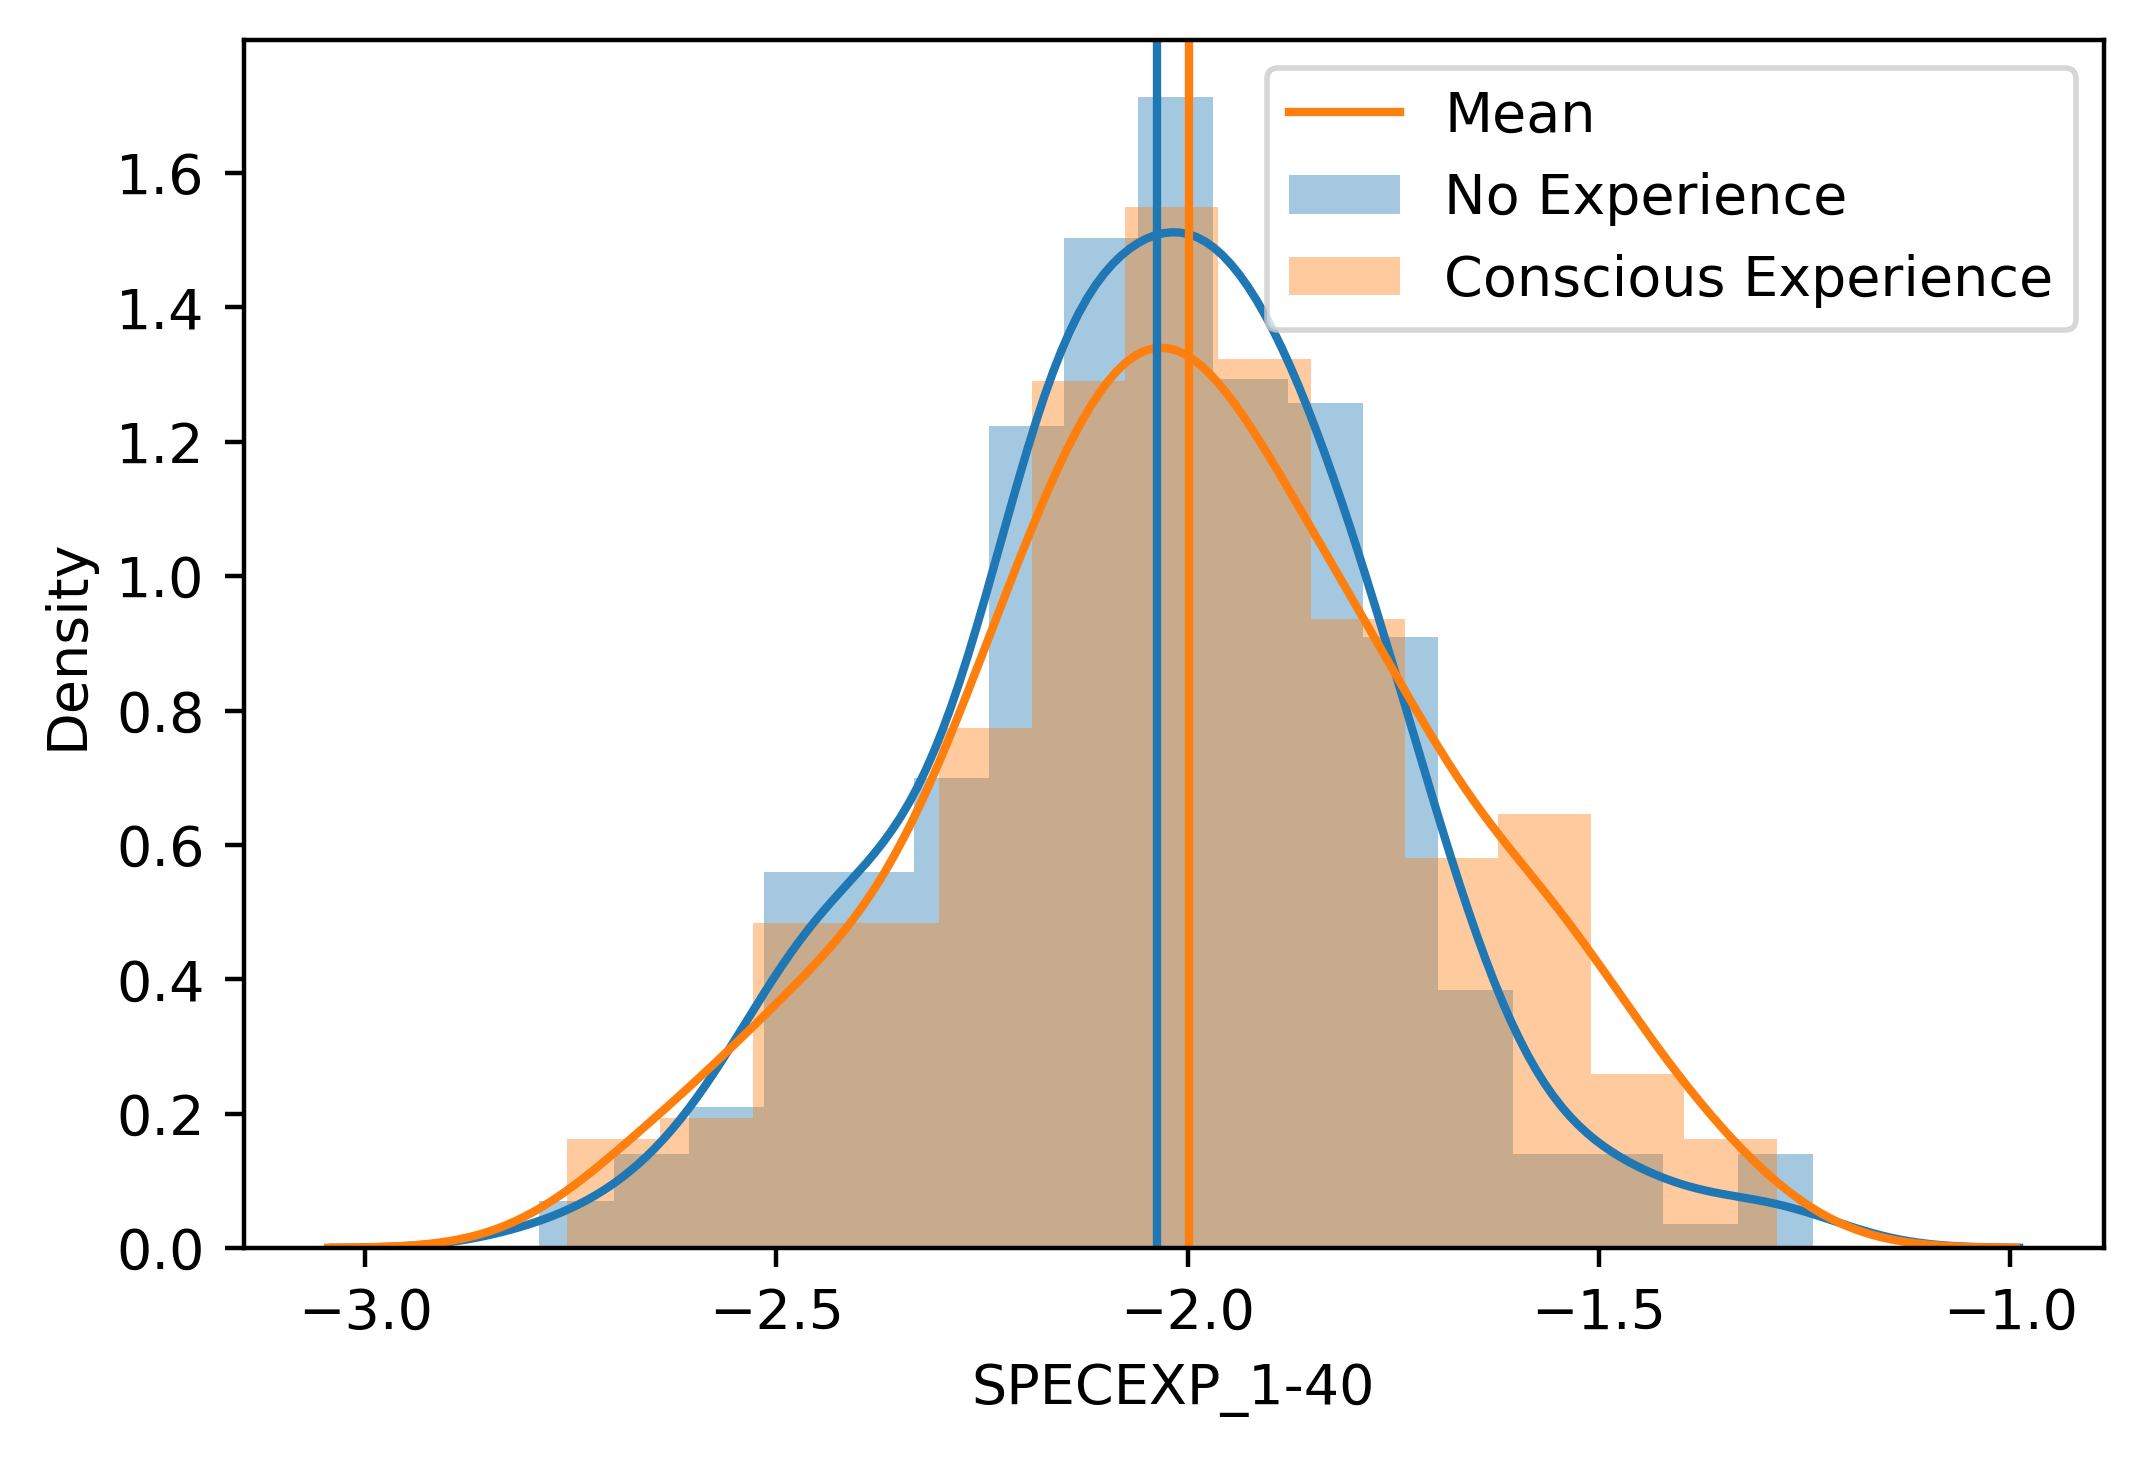

In [164]:
spec_exp_range = "SPECEXP_1-40"

nrem_dataframe["REPORT_BINARY"] = "No Experience"
nrem_dataframe.loc[nrem_dataframe[(nrem_dataframe["Q1Experience"] != "NoReport")].index,"REPORT_BINARY"] = "Conscious Experience"

fig, ax=plt.subplots(dpi=400)

## FILTER
check = np.load('./sub_q1_data/sub_reportandnoreport.npy')
print(check)
nrem_dataframe = nrem_dataframe[nrem_dataframe.ID.isin(check)].reset_index(drop=True)
nrem_dataframe = nrem_dataframe[nrem_dataframe["Q1Experience"] != "Something"].reset_index(drop=True)



nrem_dataframe["ID_Visit"] = nrem_dataframe.ID.map(str) + "_" + nrem_dataframe.Visit.map(str)

print(len(nrem_dataframe))

# nrem_dataframe = nrem_dataframe[(nrem_dataframe["SPECEXP_1-40"].notna())].copy()

# nrem_dataframe.loc[nrem_dataframe[nrem_dataframe["Q1Experience"] == "Something"].index,"Q1Experience"] = "Conscious Experience"
# nrem_dataframe.loc[nrem_dataframe[nrem_dataframe["Q1Experience"] == "Report"].index,"Q1Experience"] = "Conscious Experience"

plot = sns.distplot(nrem_dataframe[nrem_dataframe["REPORT_BINARY"] == "No Experience"][spec_exp_range], hist=True, kde=True, 
             color=plt.rcParams['axes.prop_cycle'].by_key()['color'][0],
                   label = "No Experience")
plot = sns.distplot(nrem_dataframe[nrem_dataframe["REPORT_BINARY"] == "Conscious Experience"][spec_exp_range], hist=True, kde=True, 
             color=plt.rcParams['axes.prop_cycle'].by_key()['color'][1],
                   label = "Conscious Experience")
# plot.legend()

plt.axvline(x=np.mean(nrem_dataframe[nrem_dataframe["REPORT_BINARY"] == "No Experience"][spec_exp_range]),
                       color=plt.rcParams['axes.prop_cycle'].by_key()['color'][0])
plt.axvline(x=np.mean(nrem_dataframe[nrem_dataframe["REPORT_BINARY"] == "Conscious Experience"][spec_exp_range]),
                      color=plt.rcParams['axes.prop_cycle'].by_key()['color'][1],
           label = "Mean")

plot.legend()

# ax = sns.violinplot(x="Q1Experience", y="SPECEXP_1-40", data=nrem_dataframe)

nrem_dataframe["y"] = nrem_dataframe[spec_exp_range].values
nrem_dataframe["Q1_DUMMY"] = 0
nrem_dataframe.loc[nrem_dataframe[nrem_dataframe["REPORT_BINARY"] == "Conscious Experience"].index,"Q1_DUMMY"] = 1

# nested variance component for visit within subject
# vc = {'Visit_Unique': '0 + C(Visit_Unique)'}
# md = sm.MixedLM.from_formula('y ~ Q1_DUMMY', vc_formula=vc,                                   
#                          re_formula='1', groups='ID', data=nrem_dataframe)
# mdf = md.fit()

# random intercepts model
md = smf.mixedlm('y ~ Q1_DUMMY', nrem_dataframe, groups=nrem_dataframe["ID"])
mdf = md.fit()

# # random intercepts + random slopes
# md = smf.mixedlm('y ~ Q1_DUMMY', nrem_dataframe, 
#                  groups=nrem_dataframe["ID"],
#                  re_formula="~Q1_DUMMY")
# mdf = md.fit()


plt.xlabel(spec_exp_range)

print(mdf.summary())
print(mdf.pvalues)

# plot.ax_joint.axhline(y=3)
print(len(nrem_dataframe))



In [107]:
len(nrem_dataframe[nrem_dataframe.ID.isin(check)])

686

In [95]:
nrem_dataframe["ID"].unique()

array([2000, 2004, 2006, 2008, 2009, 2010, 2011, 2012, 2019, 2020, 2022,
       2023, 2026, 2027, 2028, 2029, 2030, 2031, 2032, 2035, 2037, 2041,
       2047, 2048, 2049, 2051, 2052, 2054, 2055, 2058, 2060, 2061, 2063,
       2064, 2065, 2066, 2067, 2068, 2069, 2070, 2071, 2073, 2075, 2078,
       2080, 2083, 2084, 2085, 2087, 2092, 2097, 2099, 2101, 2102, 2103,
       2104, 2105, 2106, 2111, 2121, 2123, 2126, 2127, 2128, 2133, 2134,
       2140, 2142, 2144])

In [75]:
# fig, ax=plt.subplots(dpi=400)

# ax = sns.pointplot(x="Q1_DUMMY", y="y", 
#                    hue="ID",
#                    dodge=0.2,
#                    data=df_nona)

# ax = sns.pointplot(x="Q1_DUMMY", y="y", 
#                    color="black",
#                    axis=ax,
#                    data=df_nona)



# ax.get_legend().remove()

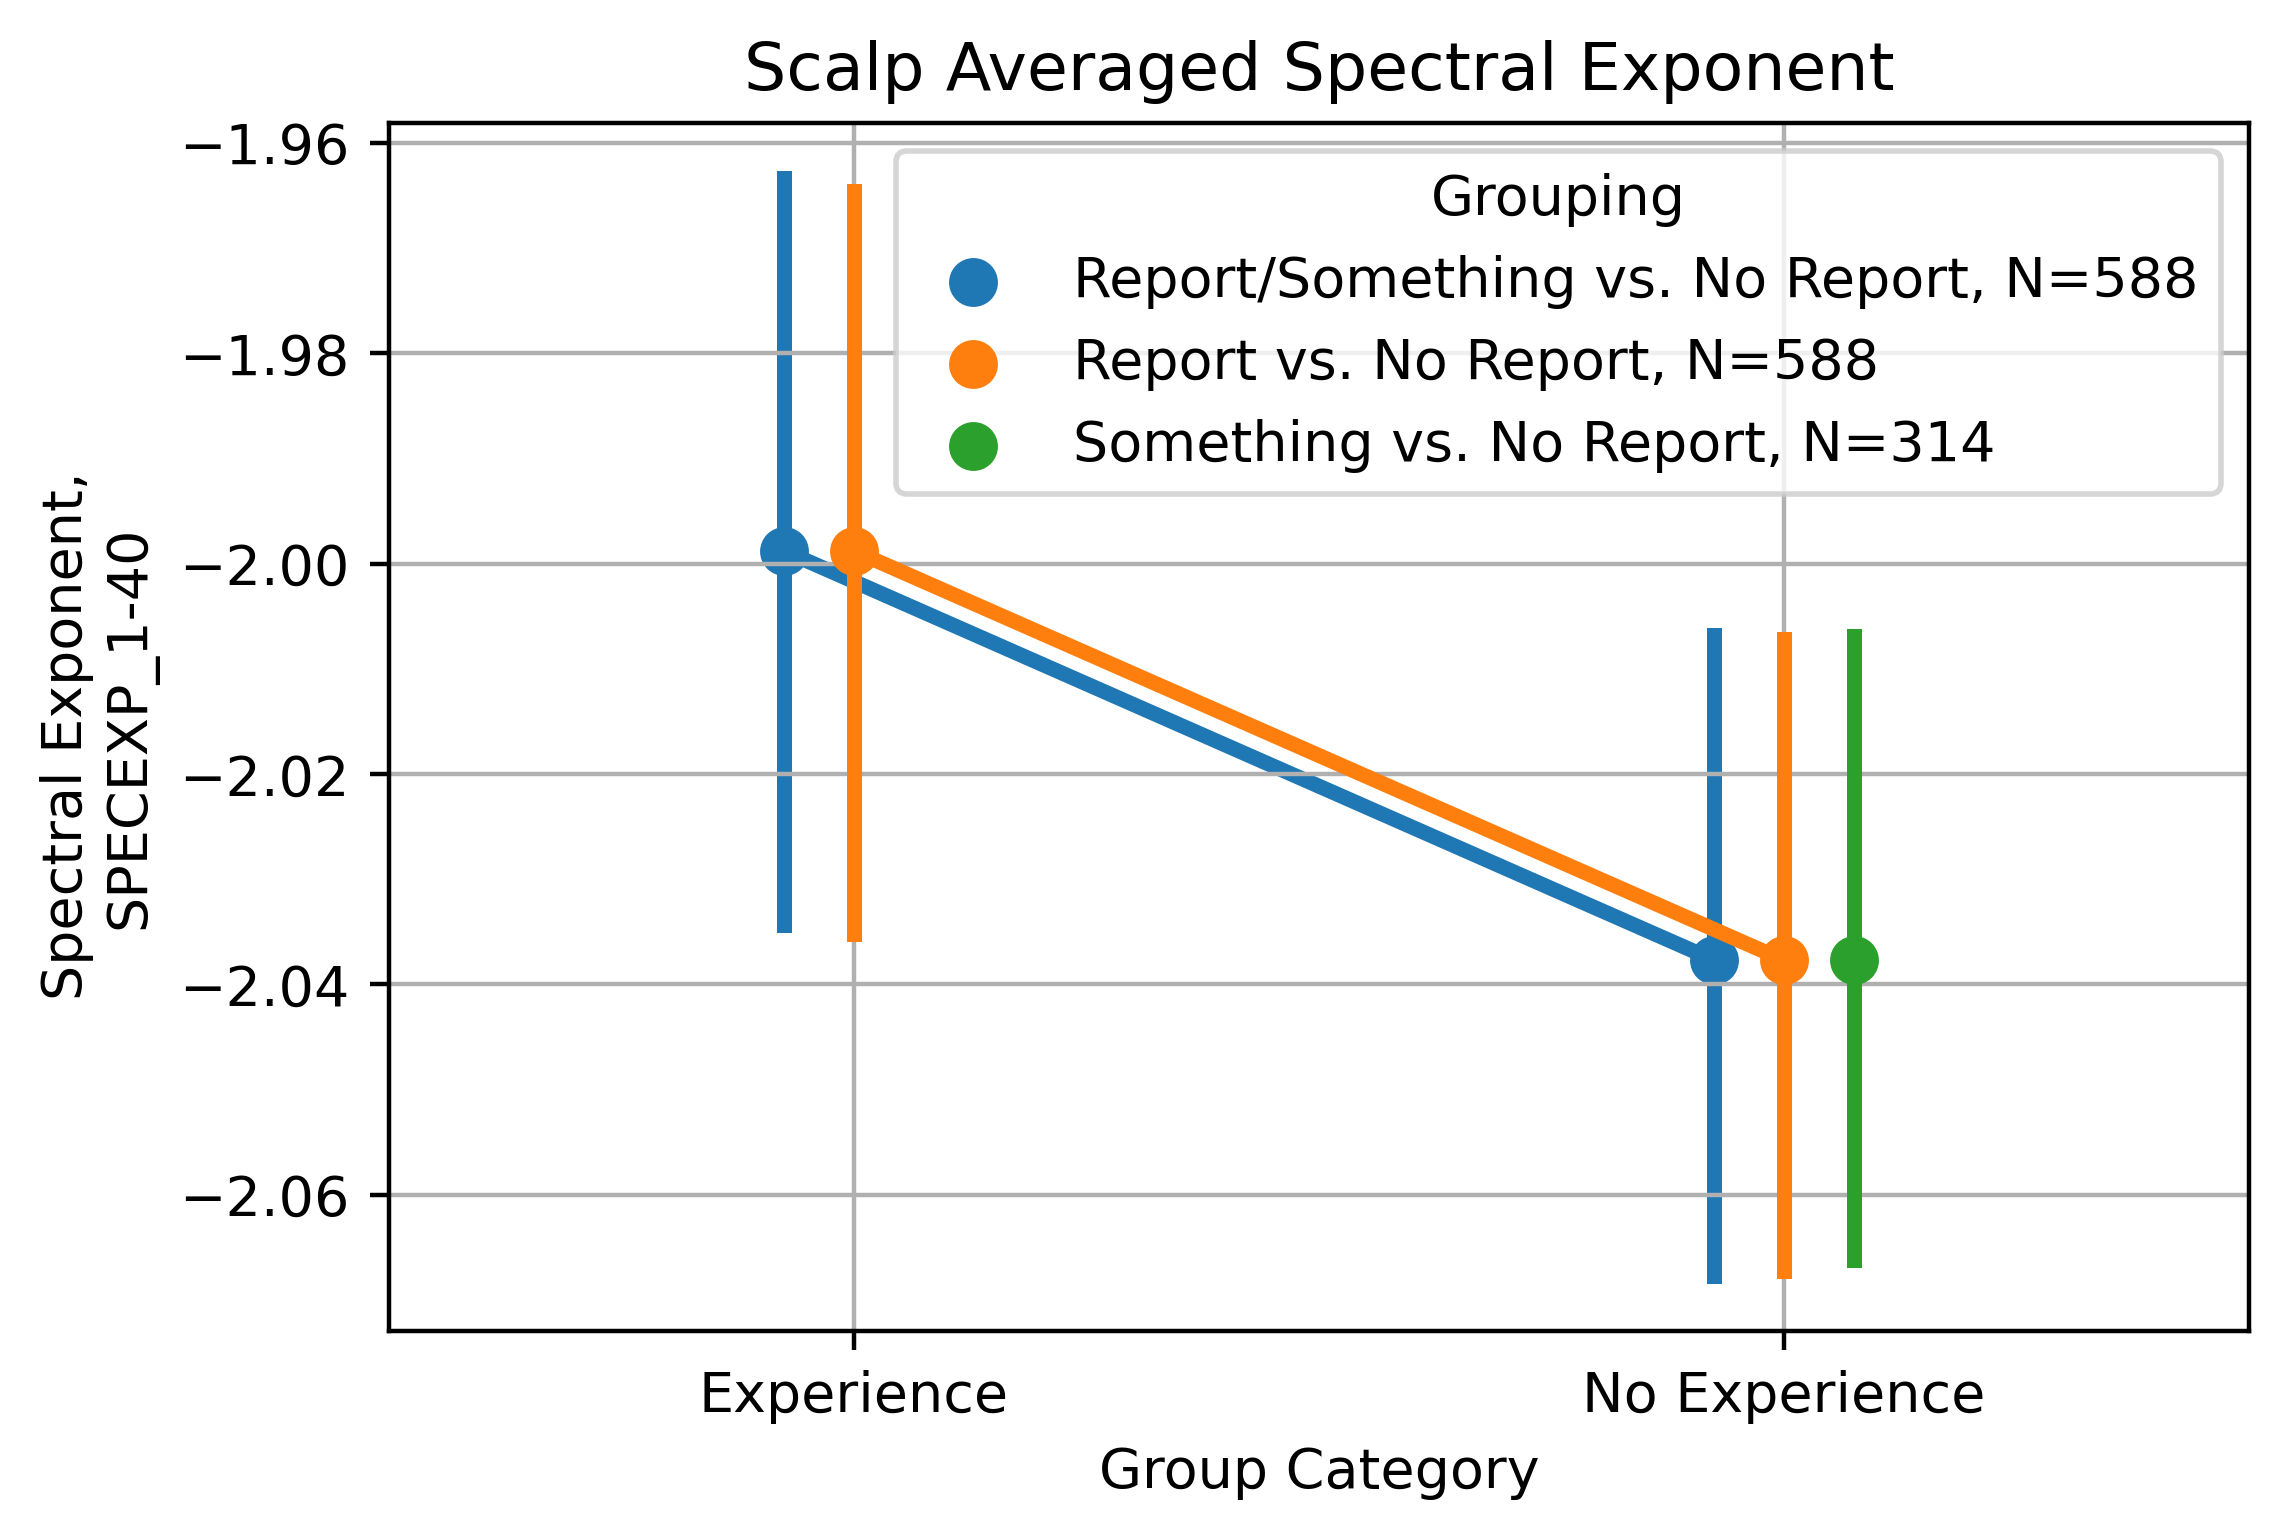

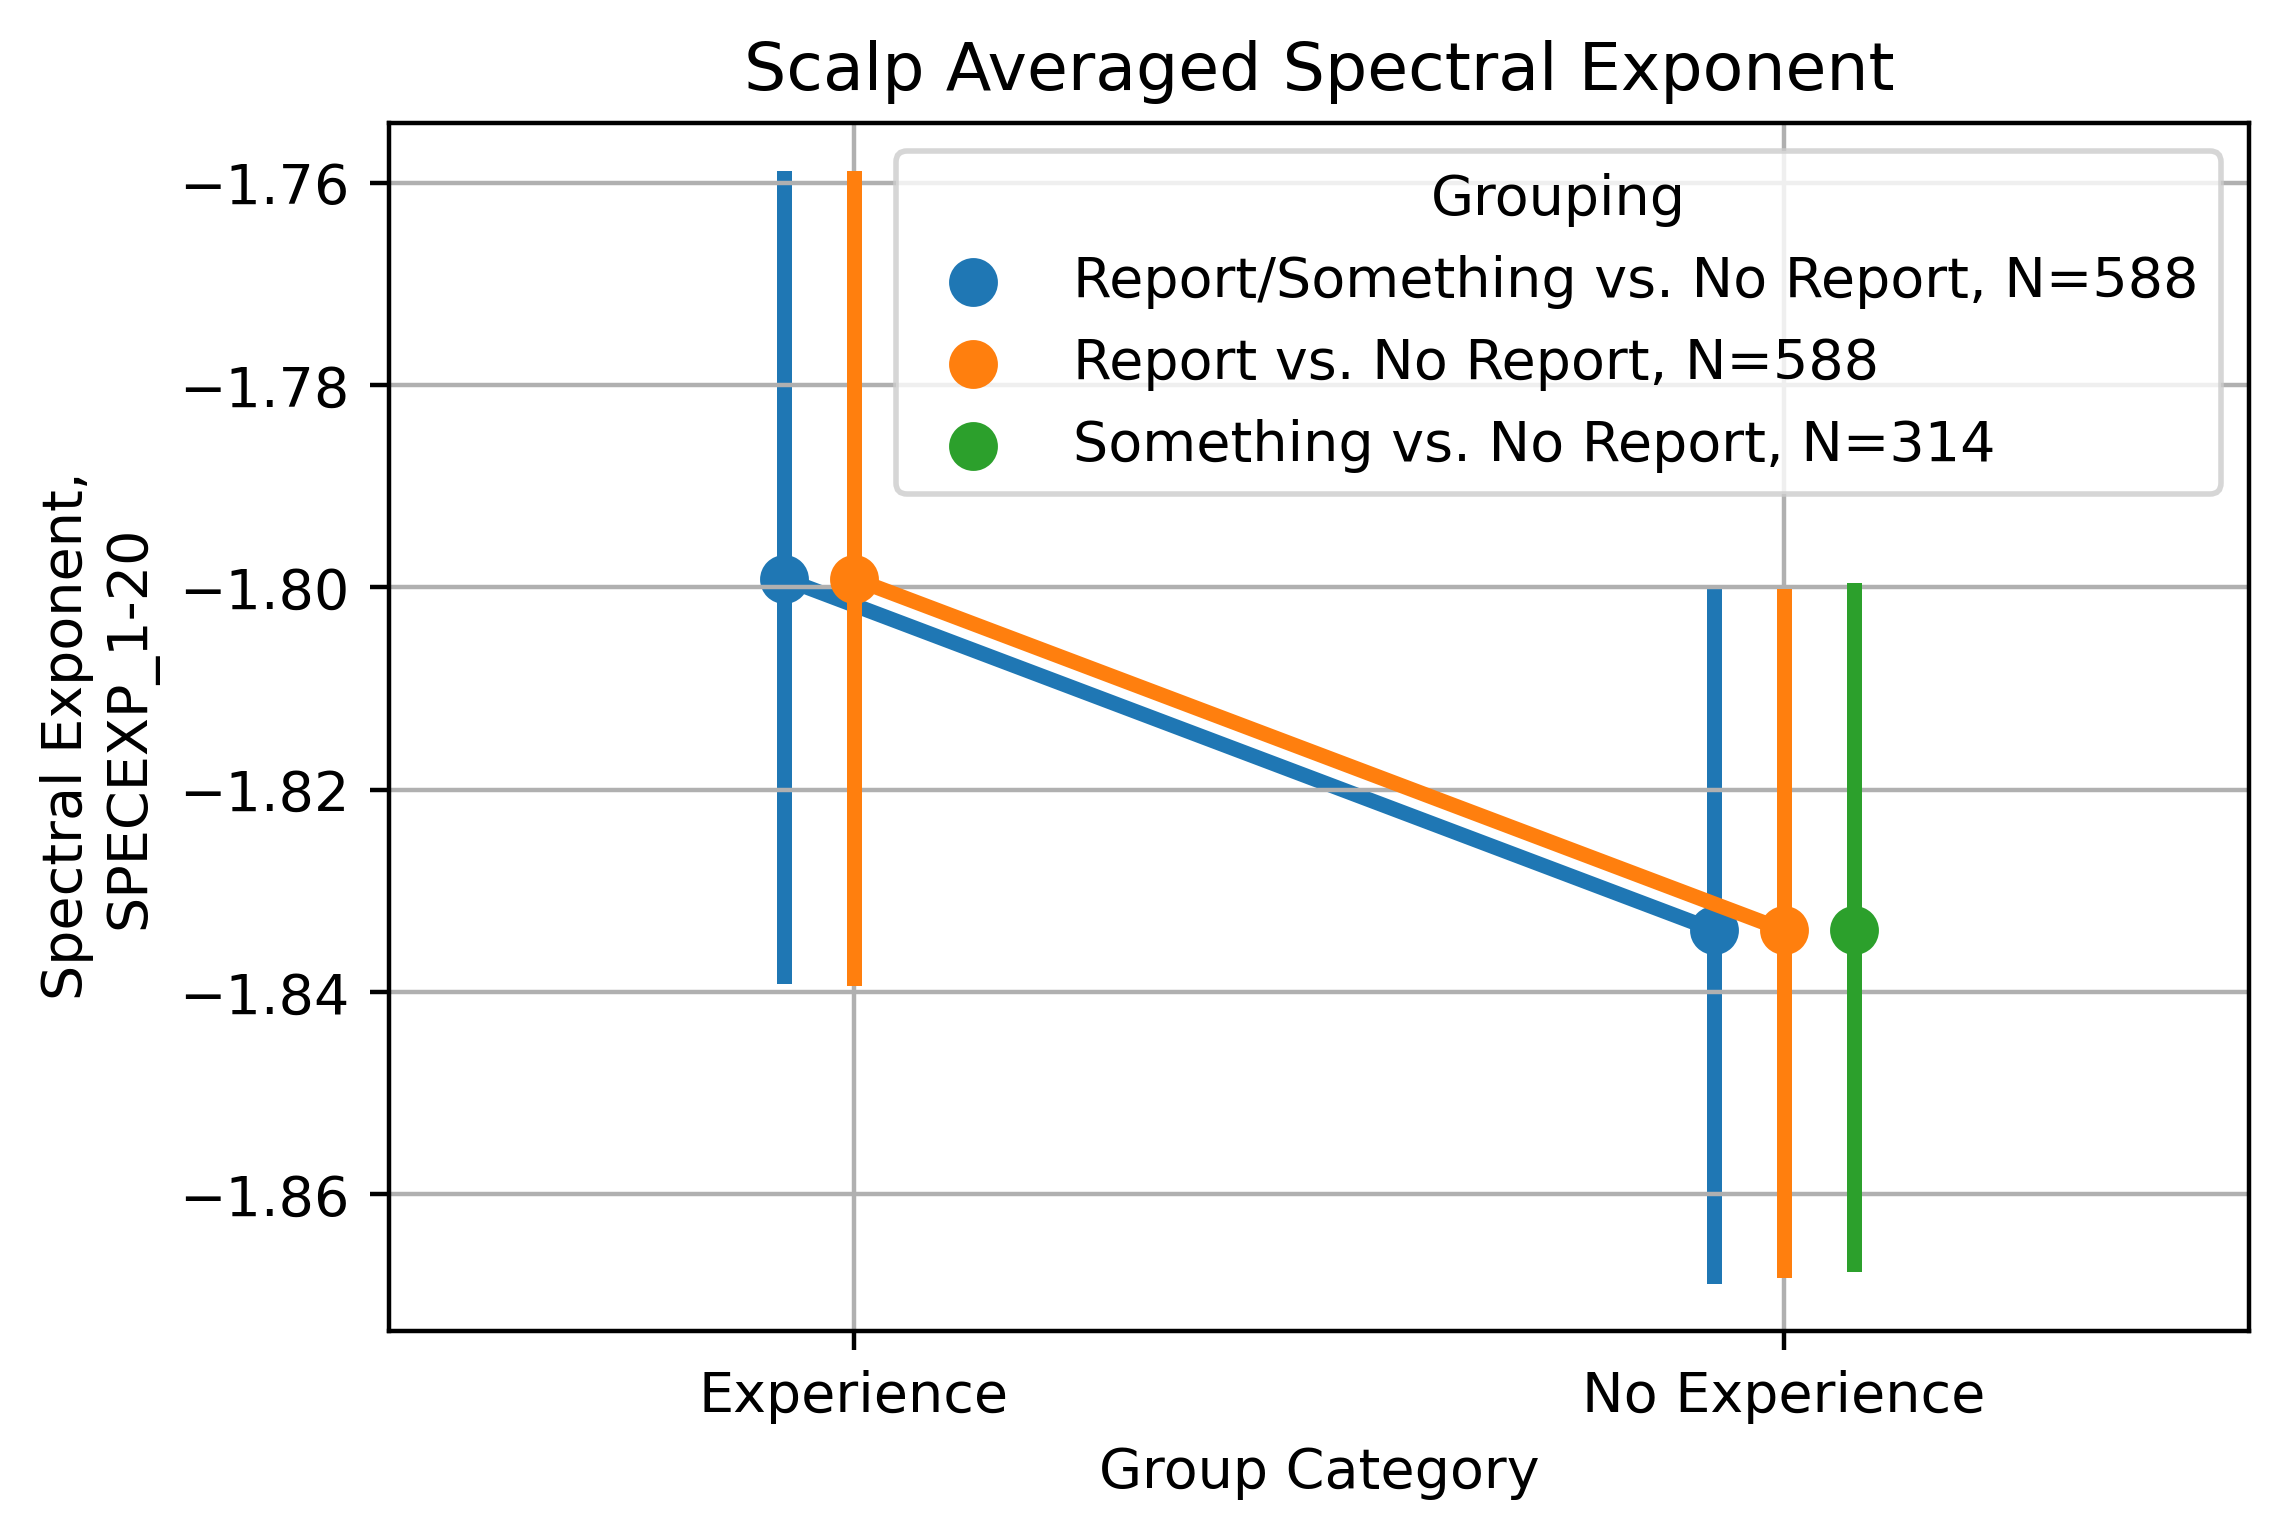

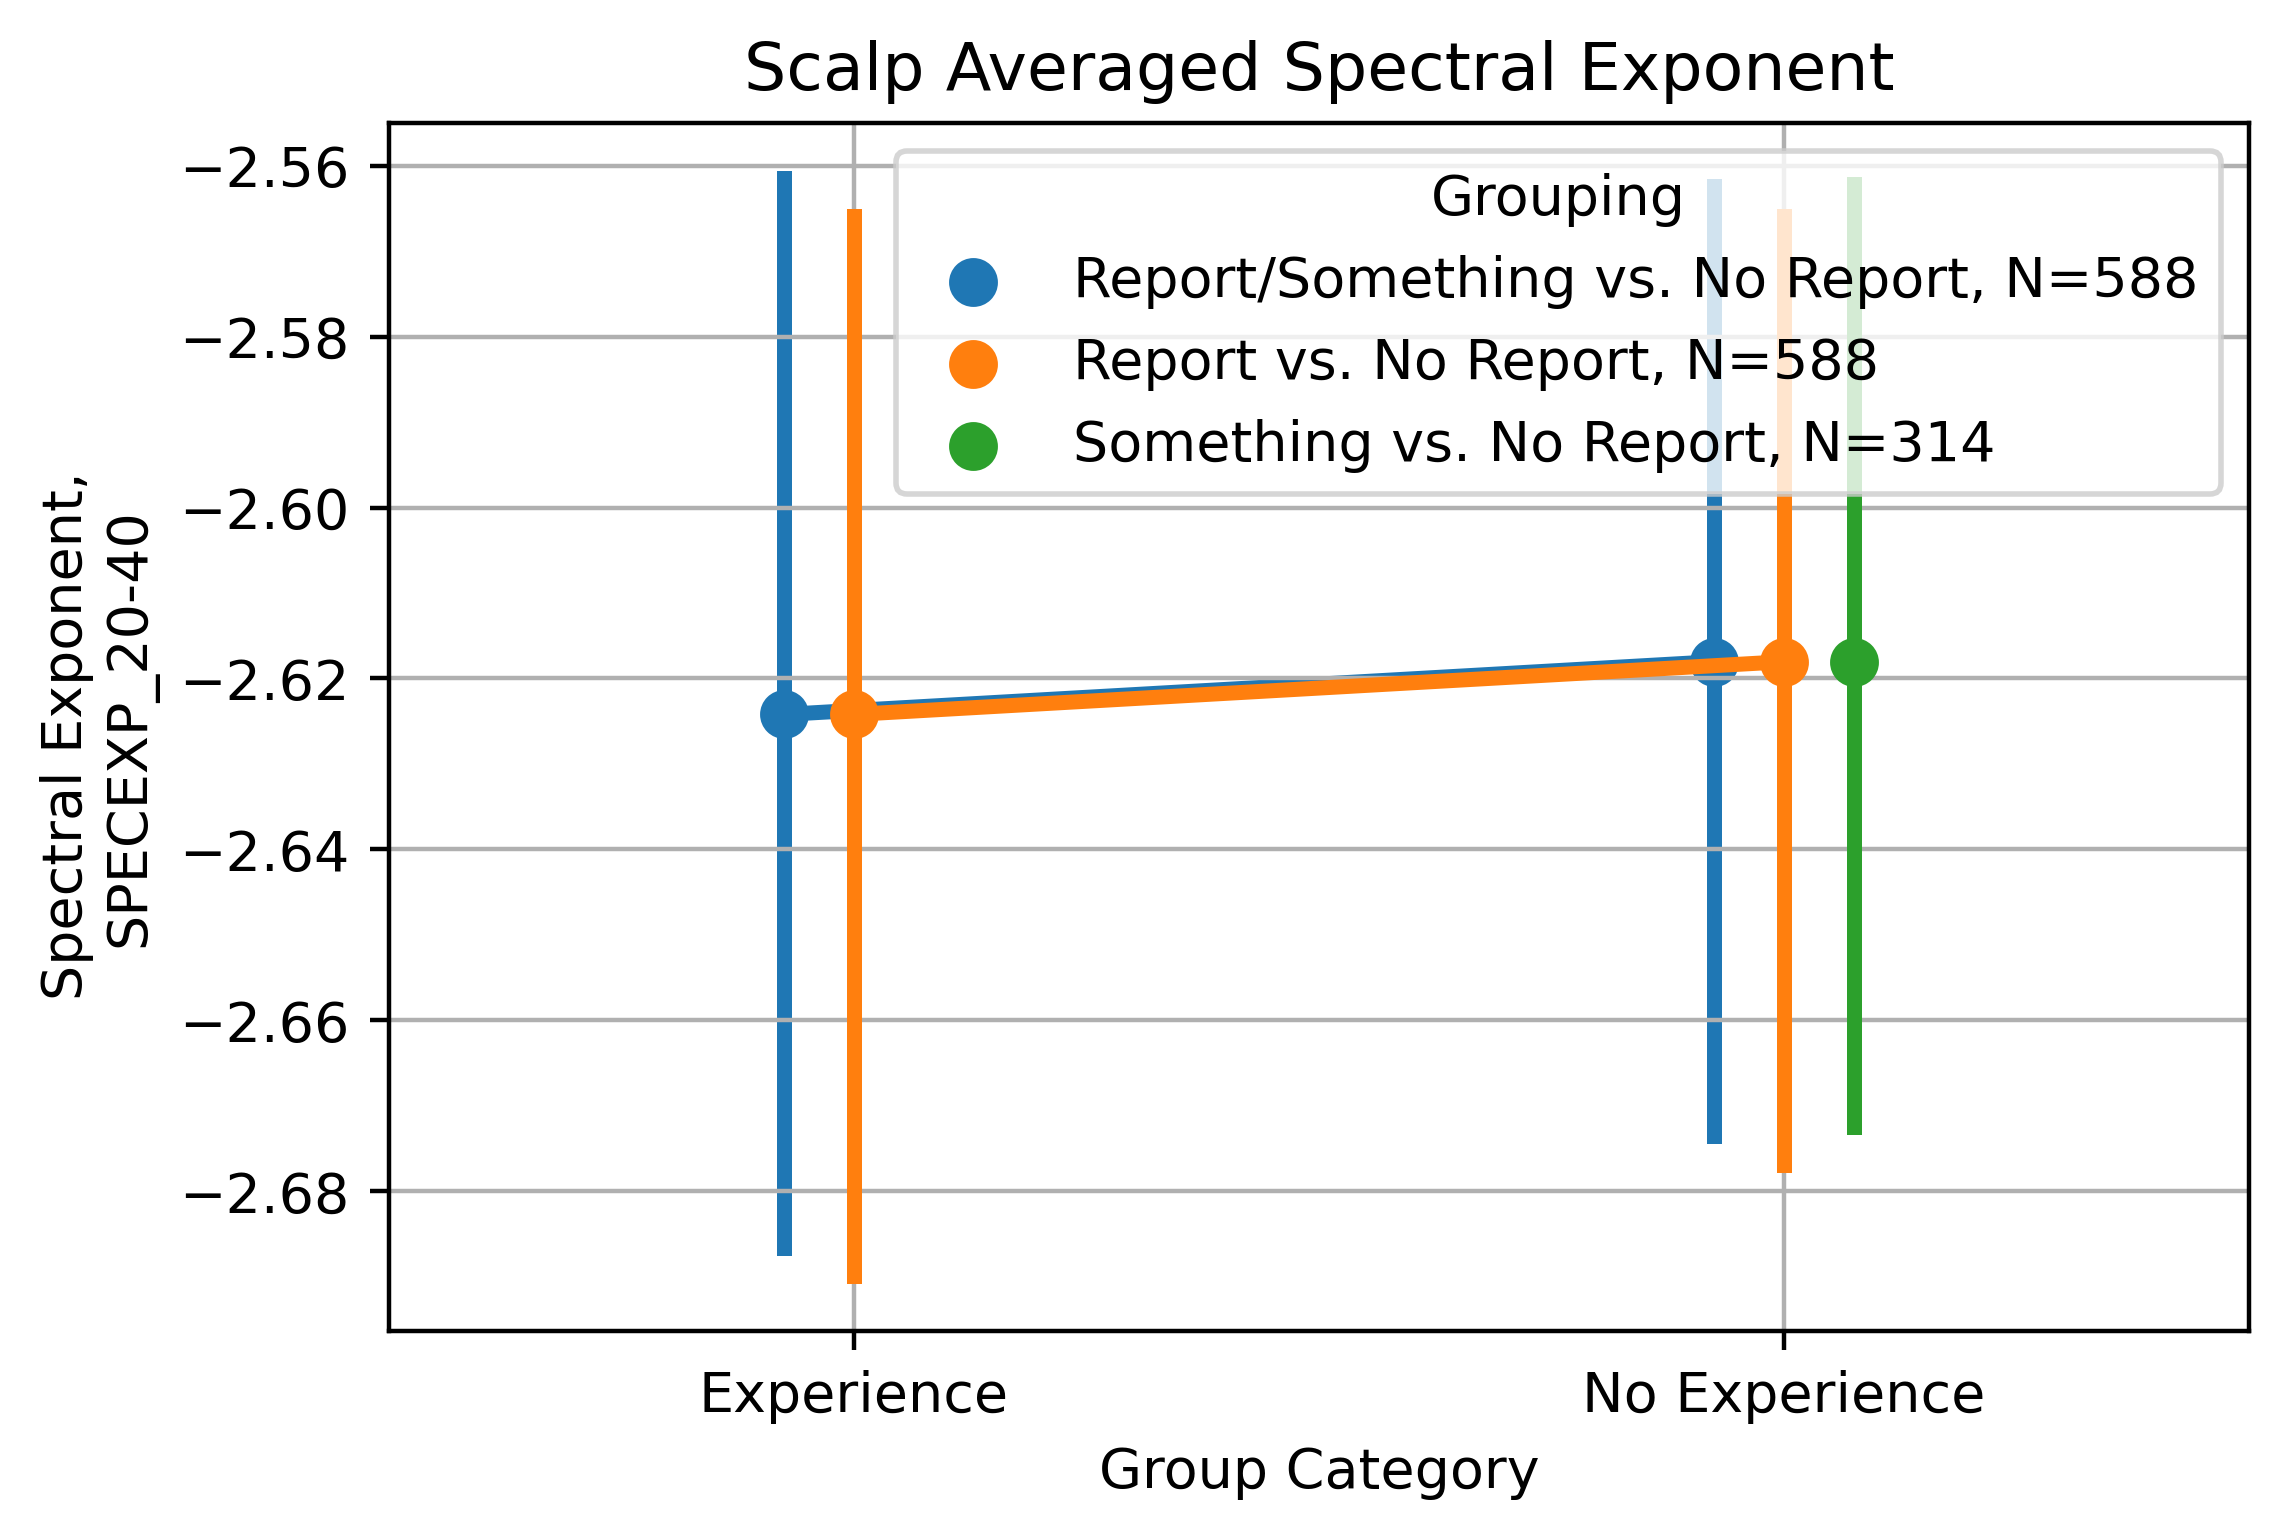

In [96]:
for spec in ["SPECEXP_1-40","SPECEXP_1-20","SPECEXP_20-40"]:
    fig, ax=plt.subplots(dpi=400)

    nrem_dataframe["REPORT_BINARY"] = "No Experience"
    nrem_dataframe.loc[nrem_dataframe[(nrem_dataframe["Q1Experience"] != "NoReport")].index,"REPORT_BINARY"] = "Experience"


    nrem_dataframe["Grouping"] = "Report/Something vs. No Report, N=" + str(len(nrem_dataframe)) 

    df_nona_b = nrem_dataframe[nrem_dataframe["Q1Experience"] != "Something"].copy()
    df_nona_b["Grouping"] = "Report vs. No Report, N=" + str(len(df_nona_b))

    df_nona_c = nrem_dataframe[nrem_dataframe["Q1Experience"] != "Report"].copy()
    df_nona_c["Grouping"] = "Something vs. No Report, N=" + str(len(df_nona_c))

    #concatenate dataframes
    df_concat = pd.concat([nrem_dataframe,df_nona_b,df_nona_c], sort=False)

    ax = sns.pointplot(x="REPORT_BINARY", y=spec, 
                       hue="Grouping",
                       dodge=0.15,
                       data=df_concat)


    ax.grid(True)
    ax.set_ylabel("Spectral Exponent, \n" + spec)
    ax.set_xlabel("Group Category")
    ax.set_title("Scalp Averaged Spectral Exponent")


### Plot p-values per channel

In [108]:
len(nrem_dataframe)

686

In [109]:
nrem_dataframe["REPORT_BINARY"] = "No Experience"
nrem_dataframe.loc[nrem_dataframe[(nrem_dataframe["Q1Experience"] != "NoReport")].index,"REPORT_BINARY"] = "Conscious Experience"

## FILTER
# nrem_dataframe = nrem_dataframe[nrem_dataframe["Q1Experience"] != "Report"]

spec_p_vals = []
spec_t_vals = []

for spec in ["SPECEXP_1-20_ALL","SPECEXP_20-40_ALL", "SPECEXP_1-40_ALL"]:
# for spec in ["SPECEXP_1-40_ALL"]:
    print(spec)
    features = np.vstack(nrem_dataframe[spec].values)
    
    p_vals = []
    t_vals = []
    
    for chan in range(0,185):
#         print(chan)
        nrem_dataframe["y"] = features[:,chan]
        nrem_dataframe["Q1_DUMMY"] = 0
        nrem_dataframe.loc[nrem_dataframe[nrem_dataframe["REPORT_BINARY"] == "Conscious Experience"].index,"Q1_DUMMY"] = 1

        
#         vc = {'Visit': '0 + C(Visit)'}
#         md = sm.MixedLM.from_formula('y ~ Q1_DUMMY', 
#                                      vc_formula=vc,                                   
#                                      re_formula='1', 
#                                      groups='ID', 
#                                      data=nrem_dataframe)
#         mdf = md.fit()
        
        # no nested variance component for visit
        md = smf.mixedlm('y ~ Q1_DUMMY', nrem_dataframe, groups=nrem_dataframe["ID"])
        mdf = md.fit()
        
#         # random intercepts
#         md = smf.mixedlm('y ~ Q1_DUMMY', nrem_dataframe, 
#                          groups=nrem_dataframe["ID"],
#                          re_formula="~Q1_DUMMY")
#         mdf = md.fit()

    #     print(mdf.summary())
        p_vals.append(mdf.pvalues['Q1_DUMMY'])
        t_vals.append(mdf.tvalues['Q1_DUMMY'])
        
    spec_p_vals.append(np.array(p_vals))
    spec_t_vals.append(np.array(t_vals))
    


SPECEXP_1-20_ALL
SPECEXP_20-40_ALL
SPECEXP_1-40_ALL


0.23.0
Reading /data/tvanasse/nccam3/data/sub-2000/eeg/ses-1/awakening-7-cleaned2_nrem.fdt


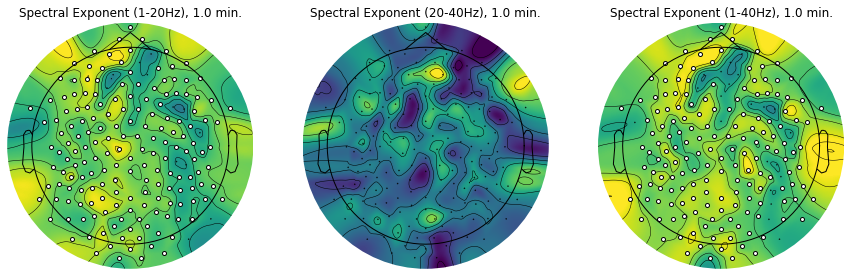

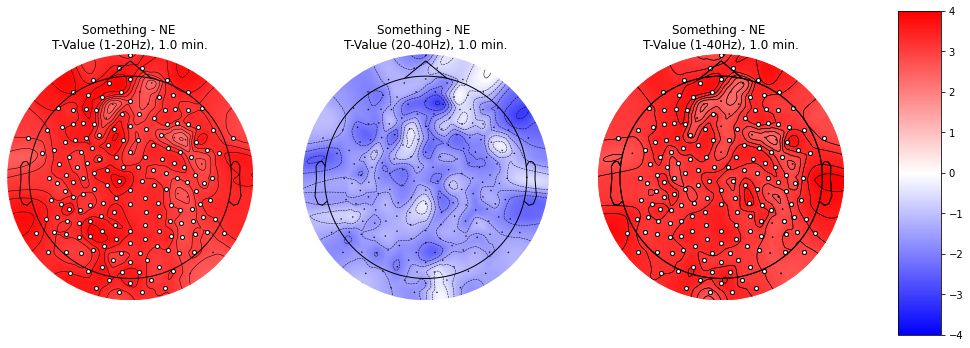

In [111]:
import mne
from matplotlib import cm, colors, colorbar
%matplotlib inline


print(mne.__version__)
raw = mne.io.read_raw_eeglab('/data/tvanasse/nccam3/data/sub-2000/eeg/ses-1/awakening-7-cleaned2_nrem.set')
# Plot the topography of ranking

## ONLY FOR PLOTTING, MNE reads positions as meters
for i in range(len(raw.info['chs'])):
    raw.info['chs'][i]['loc'] = raw.info['chs'][i]['loc']/100

fig, axs = plt.subplots(1,3, figsize=(15,5))

titles = ["Spectral Exponent (1-20Hz), " + str(timerange) + " min.",
          "Spectral Exponent (20-40Hz), " + str(timerange) + " min.",
          "Spectral Exponent (1-40Hz), " + str(timerange) + " min."]

# titles = ["Spectral Exponent (1-40Hz), " + str(timerange) + " min."]

pval = 0.005
for i in range(0,len(spec_p_vals)):
    sig_mask = np.array(spec_p_vals[i]) < pval
    mne.viz.plot_topomap(np.array(-1*np.log(spec_p_vals[i])), 
                         pos=raw.info, 
                         outlines='skirt',
                         mask=sig_mask,
#                          vmin=2.99, 
#                          vmax=7, 
                         show=False,
                         axes=axs[i],
                         cmap=cm.viridis,
                         res=150,
                         )
    axs[i].set_title(titles[i])
    
fig, axs = plt.subplots(1,3, figsize=(15,5))

titles = ["Something - NE \nT-Value (1-20Hz), " + str(timerange) + " min.",
          "Something - NE \nT-Value (20-40Hz), " + str(timerange) + " min.",
          "Something - NE \nT-Value (1-40Hz), " + str(timerange) + " min."]

# titles = ["DE - NE T-Value (1-40Hz), " + str(timerange) + " min."]

for i in range(0,len(spec_p_vals)):
    sig_mask = np.array(spec_p_vals[i]) < pval
    mne.viz.plot_topomap(np.array(spec_t_vals[i]), 
                         pos=raw.info, 
#                          outlines='skirt',
                         mask=sig_mask,
                         vmin=-4.0, 
                         vmax=4.0, 
                         show=False,
                         axes=axs[i],
                         cmap=cm.bwr,
                         res=150,
                         )
    axs[i].set_title(titles[i])

im, cm = mne.viz.plot_topomap(np.array(spec_t_vals[i]), 
                         pos=raw.info, 
#                          outlines='skirt',
                         mask=sig_mask,
                         vmin=-4.0, 
                         vmax=4.0, 
                         show=False,
                         axes=axs[i],
                         cmap=cm.bwr,
                         res=150,
                         )
# manually fiddle the position of colorbar
ax_x_start = 0.95
ax_x_width = 0.04
ax_y_start = 0.1
ax_y_height = 0.9
cbar_ax = fig.add_axes([ax_x_start, ax_y_start, ax_x_width, ax_y_height])
clb = fig.colorbar(im, cax=cbar_ax)


### Plot p-values per region

Reading /data/tvanasse/nccam3/data/sub-2001/eeg/ses-3/awakening-5-cleaned2_nrem.fdt


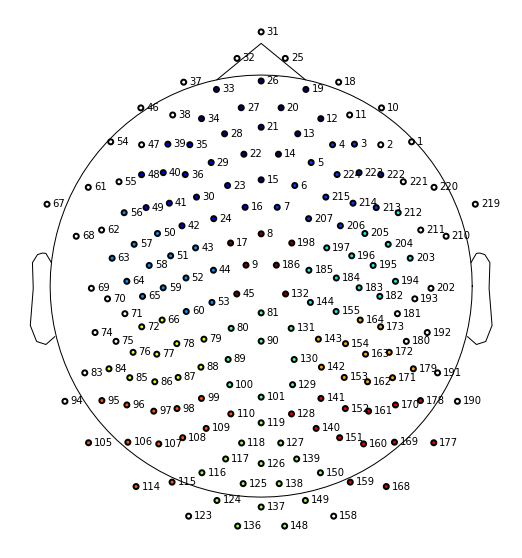

In [112]:
import mne
start_index = nrem_dataframe['PATH'][0].find('sub')
raw = mne.io.read_raw_eeglab('/data/tvanasse/nccam3/data/' +  nrem_dataframe['PATH'][0][start_index:])

## ONLY FOR PLOTTING, MNE reads positions as meters
for i in range(len(raw.info['chs'])):
    raw.info['chs'][i]['loc'] = raw.info['chs'][i]['loc']/100


hist_bins = [["26","27","20","21","28","15","22","14","13","34","33","12","19"],
             
             ["16","23","29","35","36","30","24","42","41","49","48","40","39"],
             
             ["7","6","5","4","3","224","215","207","214","213","222","206","39","223"],
             
             ["56","63","57","44","43","53","52","51","60","59","58","65","64","50"],
             
             ["212","205","203","204","144","185","197","155","184","196","195","183","182","194"],
             
             ["81","80","131","130","129","101","100","89","90"],
             
             ["119","118","117","126","139","127","125","138","137","116","124","149","150","136","148"],
             
             ["79","78","77","88","87","86","85","76","72","66","84",],
             
             ["143","154","163","142","153","162","164","173","172","171","179"],
             
             ["110","99","109","108","98","97","107","115","114","106","96","95","105"],
             
             ["128","141","140","151","152","161","160","159","169","168","170","178","177"],
             
             ["8","17","9","45","132","186","198"]
             ]

groups = []
for ch_names in hist_bins:
    indices = [raw.ch_names.index(ch_name) for ch_name in ch_names]
    groups.append(indices)
    
fig, axs = plt.subplots(figsize=(10,10))
mne.viz.plot_sensors(raw.info, 
                     ch_groups=groups, 
                     axes=axs,
                     show_names=True)

fig.savefig("figures/sensor_plot.png", dpi=400)

In [113]:
import scipy.io as sio
inside185ch = sio.loadmat('../channel_location_file/inside185ch.mat')

#256 labels/indices
parcels_256labels = {"Frontal_Central": np.array(list(map(int,hist_bins[0]))),
     "Frontal_Left": np.array(list(map(int,hist_bins[1]))),
     "Frontal_Right": np.array(list(map(int,hist_bins[2]))),
     "Temporal_Left": np.array(list(map(int,hist_bins[3]))),
     "Temporal_Right": np.array(list(map(int,hist_bins[4]))),
     "Parietal_Central": np.array(list(map(int,hist_bins[5]))),
     "Occipital_Central": np.array(list(map(int,hist_bins[6]))),
     "Parietal_Left":np.array(list(map(int,hist_bins[7]))),
     "Parietal_Right":np.array(list(map(int,hist_bins[8]))),
     "Occipital_Left":np.array(list(map(int,hist_bins[9]))),
     "Occipital_Right":np.array(list(map(int,hist_bins[10]))),
     "Central":np.array(list(map(int,hist_bins[10])))
     }

#256 labels to 185indices
parcels_185indices = {}

for parcel in list(parcels_256labels.keys()):
    translate = []
    
    for i in range(0,len(parcels_256labels[parcel])):
        translate.append(np.where(np.squeeze(inside185ch['inside185ch']) == parcels_256labels[parcel][i])[0][0])
    
    parcels_185indices.update({parcel:np.array(list(map(int,translate)))})

In [114]:
import warnings
warnings.filterwarnings('ignore')

nrem_dataframe["REPORT_BINARY"] = "No Experience"
nrem_dataframe.loc[nrem_dataframe[(nrem_dataframe["Q1Experience"] != "NoReport")].index,"REPORT_BINARY"] = "Conscious Experience"

## FILTER
nrem_dataframe = nrem_dataframe[nrem_dataframe["Q1Experience"] != "Report"]

spec_p_vals = []
spec_t_vals = []

for spec in ["SPECEXP_1-20_ALL","SPECEXP_20-40_ALL", "SPECEXP_1-40_ALL"]:
    print("\n\n\n" + spec)
    features = np.vstack(nrem_dataframe[spec].values)
    
    p_vals = []
    t_vals = []
    
    for parcel in list(parcels_185indices.keys()):
        #take mean across channels
        nrem_dataframe["y"] = np.mean(features[:,parcels_185indices[parcel]],axis=1)
        
#     for chan in range(0,185):
#         print(chan)
#         nrem_dataframe["y"] = features[:,chan]
        nrem_dataframe["Q1_DUMMY"] = 0
        nrem_dataframe.loc[nrem_dataframe[nrem_dataframe["REPORT_BINARY"] == "Conscious Experience"].index,"Q1_DUMMY"] = 1

        
        vc = {'Visit': '0 + C(Visit)'}
        md = sm.MixedLM.from_formula('y ~ Q1_DUMMY', 
                                     vc_formula=vc,                                   
                                     re_formula='1', 
                                     groups='ID', 
                                     data=nrem_dataframe)
        mdf = md.fit()
        
#         # no nested variance component for visit
#         md = smf.mixedlm('y ~ Q1_DUMMY', nrem_dataframe, groups=nrem_dataframe["ID"])
#         mdf = md.fit()
        
#         # random intercepts
#         md = smf.mixedlm('y ~ Q1_DUMMY', nrem_dataframe, 
#                          groups=nrem_dataframe["ID"],
#                          re_formula="~Q1_DUMMY")
#         mdf = md.fit()

        if mdf.pvalues['Q1_DUMMY'] < 0.05/12:
            print(parcel + ", ")
#             print(spec)
#             print("corrected pvalue: " + str(mdf.pvalues['Q1_DUMMY']*11))
#             print("t-value: " + str(mdf.tvalues['Q1_DUMMY']) + "\n")


    #     print(mdf.summary())
        p_vals.append(mdf.pvalues['Q1_DUMMY'])
        t_vals.append(mdf.tvalues['Q1_DUMMY'])
        
    spec_p_vals.append(np.array(p_vals))
    spec_t_vals.append(np.array(t_vals))
    





SPECEXP_1-20_ALL
Frontal_Central, 
Frontal_Left, 
Frontal_Right, 
Temporal_Left, 
Temporal_Right, 
Parietal_Central, 
Occipital_Central, 
Parietal_Left, 
Parietal_Right, 
Occipital_Left, 
Occipital_Right, 
Central, 



SPECEXP_20-40_ALL



SPECEXP_1-40_ALL
Frontal_Left, 
Frontal_Right, 
Temporal_Left, 
Temporal_Right, 
Parietal_Central, 
Occipital_Central, 
Parietal_Left, 
Parietal_Right, 
Occipital_Left, 


### 2-D Plot

986

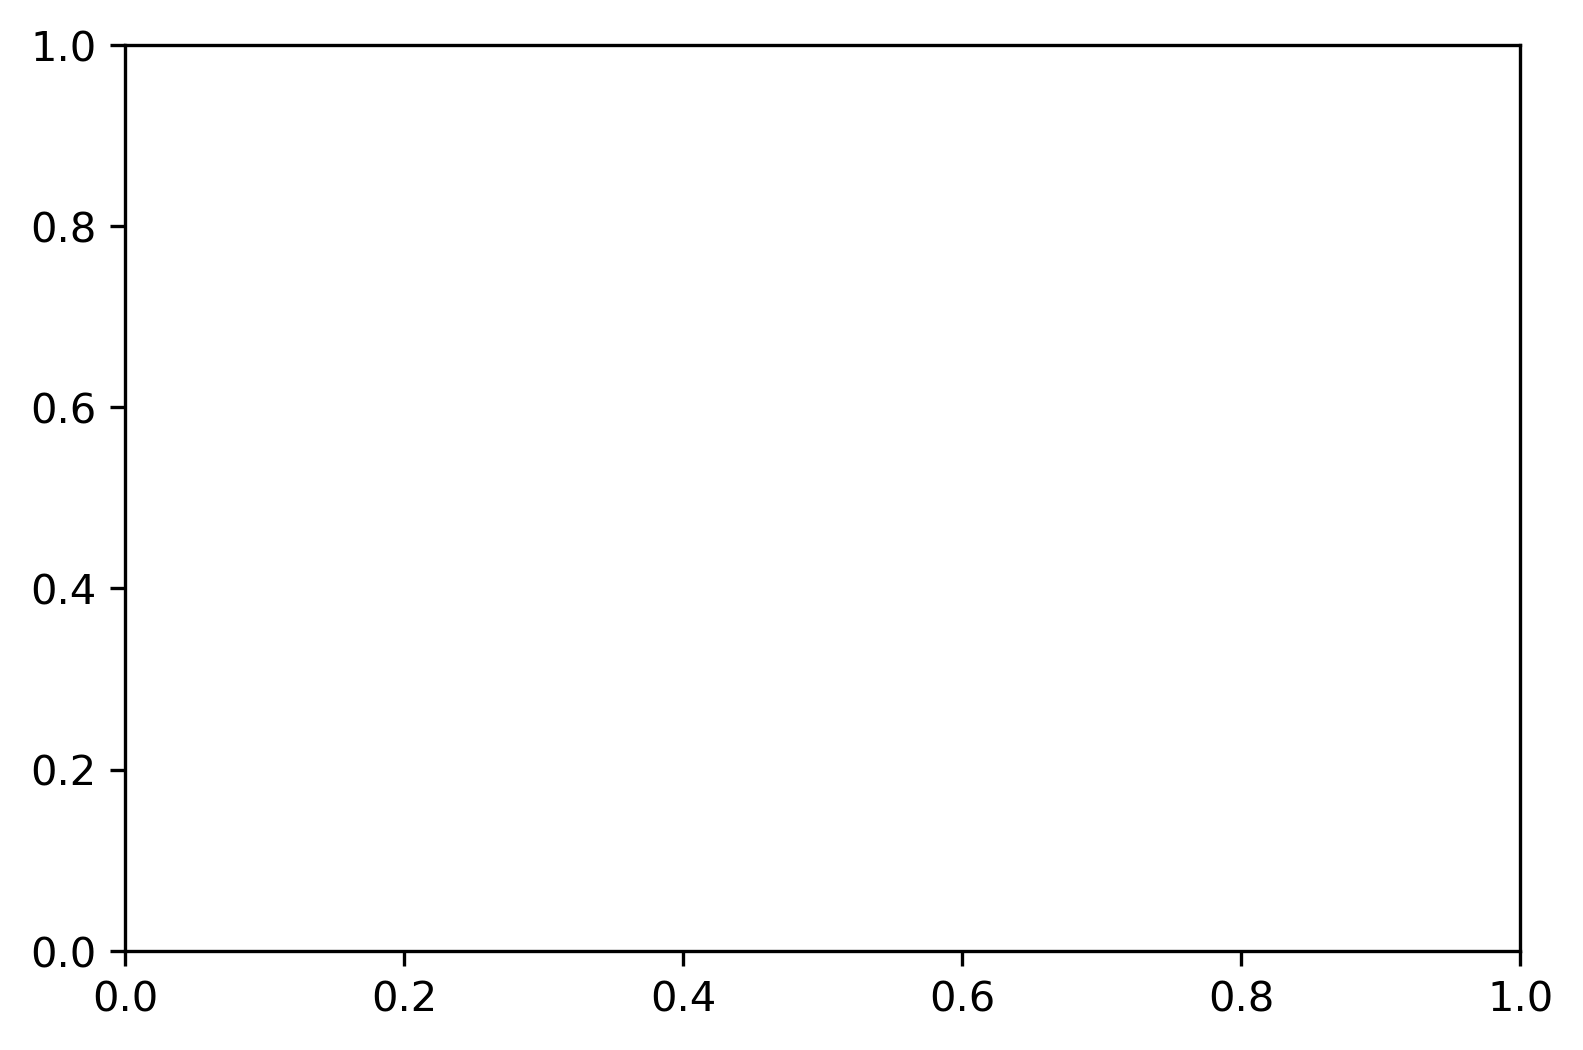

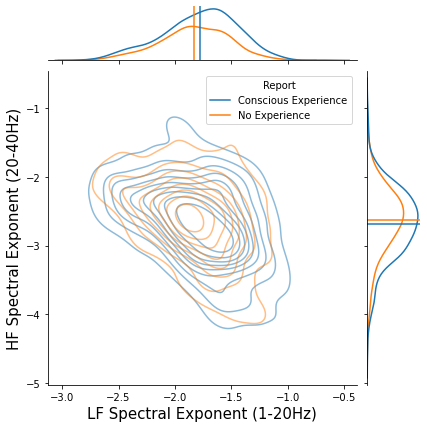

In [131]:
import seaborn as sns 

fig, ax=plt.subplots( dpi=300)

nrem_dataframe["Report"] = "No Experience"
nrem_dataframe.loc[nrem_dataframe[(nrem_dataframe["Q1Experience"] != "NoReport")].index,"Report"] = "Conscious Experience"


# nrem_dataframe.loc[nrem_dataframe[nrem_dataframe["Q1Experience"] == "Something"].index,"Q1Experience"] = "Report/Something"
# nrem_dataframe.loc[nrem_dataframe[nrem_dataframe["Q1Experience"] == "Report"].index,"Q1Experience"] = "Report/Something"

plot = sns.jointplot(data=nrem_dataframe, 
#               size=8,
              s=8,
              alpha=0.5,
              kind="kde",
              x="SPECEXP_1-20", 
              y="SPECEXP_20-40", 
              hue="Report",
#               order=["Conscious Experience","No Exprience"],
              ax=ax)

plot.ax_marg_x.axvline(x=np.mean(nrem_dataframe[nrem_dataframe["Q1Experience"] == "Report/Something"]["SPECEXP_1-20"]),
                       color=plt.rcParams['axes.prop_cycle'].by_key()['color'][0])
plot.ax_marg_x.axvline(x=np.mean(nrem_dataframe[nrem_dataframe["Q1Experience"] == "NoReport"]["SPECEXP_1-20"]),
                      color=plt.rcParams['axes.prop_cycle'].by_key()['color'][1])

plot.ax_marg_y.axhline(y=np.mean(nrem_dataframe[nrem_dataframe["Q1Experience"] == "Report/Something"]["SPECEXP_20-40"]),
                       color=plt.rcParams['axes.prop_cycle'].by_key()['color'][0])
plot.ax_marg_y.axhline(y=np.mean(nrem_dataframe[nrem_dataframe["Q1Experience"] == "NoReport"]["SPECEXP_20-40"]),
                      color=plt.rcParams['axes.prop_cycle'].by_key()['color'][1])

plot.set_axis_labels(xlabel="LF Spectral Exponent (1-20Hz)", ylabel="HF Spectral Exponent (20-40Hz)",
                    fontsize=15)

# Change seaborn plot size
# fig = plt.gcf()
# fig.set_size_inches(6, 6)
plot.savefig("figures/2dspecexp.png", dpi=400)

len(nrem_dataframe)

/home/tvanasse/miniconda/envs/nccam/lib/python3.6/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/tvanasse/miniconda/envs/nccam/lib/python3.6/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/tvanasse/miniconda/envs/nccam/lib/python3.6/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-leve

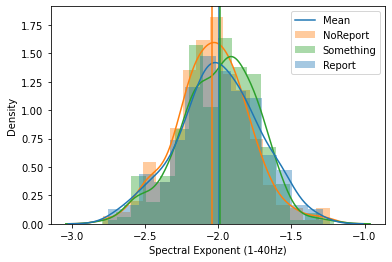

         Source        SS   DF        MS         F     p-unc       np2  \
0  Q1Experience  0.097530    2  0.048765  3.030606  0.050903  0.034427   
1         Error  2.735432  170  0.016091       NaN       NaN       NaN   

        eps  
0  0.977926  
1       NaN  
         Source        SS   DF        MS         F     p-unc       np2  \
0  Q1Experience  0.188532    2  0.094266  5.350326  0.005297  0.040425   
1         Error  4.475170  254  0.017619       NaN       NaN       NaN   

        eps  
0  0.972835  
1       NaN  
           Mixed Linear Model Regression Results
Model:            MixedLM Dependent Variable: SPECEXP_20_40
No. Observations: 610     Method:             REML         
No. Groups:       98      Scale:              0.1129       
Min. group size:  1       Log-Likelihood:     -304.6023    
Max. group size:  16      Converged:          Yes          
Mean group size:  6.2                                      
------------------------------------------------------------


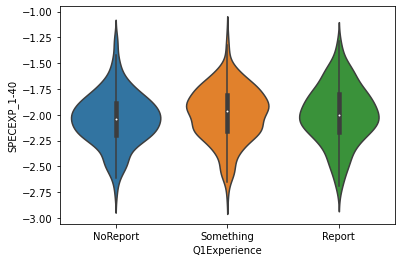

/home/tvanasse/miniconda/envs/nccam/lib/python3.6/site-packages/outdated/utils.py:18: OutdatedPackageWarning: The package pingouin is out of date. Your version is 0.3.11, the latest is 0.3.12.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  **kwargs


In [12]:
df_nona = nrem_dataframe[(nrem_dataframe["SPECEXP_1-40"].notna()) &\
                         (nrem_dataframe["HOLD_OUT"] == False)].copy()

plot = sns.distplot(df_nona[df_nona["Q1Experience"] == "NoReport"]["SPECEXP_1-40"], hist=True, kde=True, 
             color=plt.rcParams['axes.prop_cycle'].by_key()['color'][1],
                   label = "NoReport")
plot = sns.distplot(df_nona[df_nona["Q1Experience"] == "Something"]["SPECEXP_1-40"], hist=True, kde=True, 
             color=plt.rcParams['axes.prop_cycle'].by_key()['color'][2],
                   label = "Something")
plot = sns.distplot(df_nona[df_nona["Q1Experience"] == "Report"]["SPECEXP_1-40"], hist=True, kde=True, 
             color=plt.rcParams['axes.prop_cycle'].by_key()['color'][0],
                   label = "Report")
# plot.legend()

plt.axvline(x=np.mean(df_nona[df_nona["Q1Experience"] == "NoReport"]["SPECEXP_1-40"]),
                       color=plt.rcParams['axes.prop_cycle'].by_key()['color'][1])
plt.axvline(x=np.mean(df_nona[df_nona["Q1Experience"] == "Report"]["SPECEXP_1-40"]),
                      color=plt.rcParams['axes.prop_cycle'].by_key()['color'][0],
                       label = "Mean")
plt.axvline(x=np.mean(df_nona[df_nona["Q1Experience"] == "Something"]["SPECEXP_1-40"]),
                      color=plt.rcParams['axes.prop_cycle'].by_key()['color'][2])

plot.legend()

plt.xlabel("Spectral Exponent (1-40Hz)")
plt.show()

ax = sns.violinplot(x="Q1Experience", y="SPECEXP_1-40", data=df_nona,
                   order=["NoReport","Something","Report"])

# df_nona["SPECEXP_1_40"] = df_nona["SPECEXP_1-40"].values
# md = smf.mixedlm("SPECEXP_1_40 ~ C(Q1Experience)", df_nona, groups=df_nona["ID"])
# mdf = md.fit()
# print(mdf.summary())
# print(mdf.pvalues)

import pingouin as pg
df_nona["SPECEXP_1_40"] = df_nona["SPECEXP_1-40"].values
df_nona["ID_plus_Visit"] = 100*df_nona["ID"].values + df_nona["Visit"].values

x = pg.rm_anova(data=df_nona, dv="SPECEXP_1-40", within="Q1Experience", subject="ID", detailed=True)
print(x)
x = pg.rm_anova(data=df_nona, dv="SPECEXP_1-40", within="Q1Experience", subject="ID_plus_Visit", detailed=True)
print(x)

# df_nona["SPECEXP_1_20"] = df_nona["SPECEXP_1-40"].values
# df_nona = df_nona[df_nona["Q1Experience"] != "Something"]
# df_nona["Q1_DUMMY"] = 0
# df_nona.loc[df_nona[df_nona["Q1Experience"] == "Report"].index,"Q1_DUMMY"] = 1
# vc = {'Visit': '0 + C(Visit)'}
# md = sm.MixedLM.from_formula('SPECEXP_1_40 ~ Q1_DUMMY', vc_formula=vc,                                   
#                          re_formula='1', groups='ID', data=df_nona)
# mdf = md.fit()

# # no nested variance component for visit
# md = smf.mixedlm('SPECEXP_1_40 ~ Q1_DUMMY', df_nona, groups=df_nona["ID"])
# mdf = md.fit()

print(mdf.summary())
print(mdf.pvalues)

# plot.ax_joint.axhline(y=3)
print(len(df_nona))


         Source        SS   DF        MS         F     p-unc       np2  \
0  Q1Experience  0.120155    2  0.060078  3.085787  0.048233  0.034638   
1         Error  3.348688  172  0.019469       NaN       NaN       NaN   

        eps  
0  0.972944  
1       NaN  
         Source        SS   DF        MS         F     p-unc       np2  \
0  Q1Experience  0.200508    2  0.100254  6.782997  0.001461  0.073106   
1         Error  2.542198  172  0.014780       NaN       NaN       NaN   

        eps  
0  0.982937  
1       NaN  
986


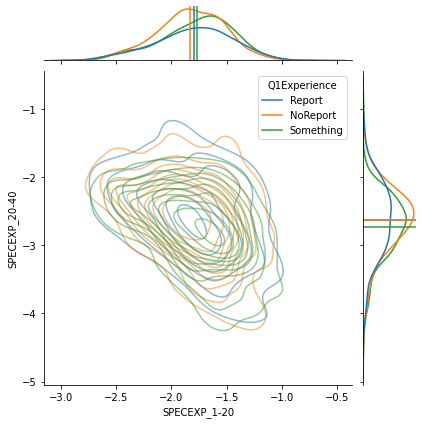

In [136]:
import seaborn as sns 


plot = sns.jointplot(data=nrem_dataframe, 
              s=8,
              alpha=0.5,
              kind="kde",
              x="SPECEXP_1-20", 
              y="SPECEXP_20-40", 
              hue="Q1Experience")

plot.ax_marg_x.axvline(x=np.mean(nrem_dataframe[nrem_dataframe["Q1Experience"] == "Report"]["SPECEXP_1-20"]),
                       color=plt.rcParams['axes.prop_cycle'].by_key()['color'][0])
plot.ax_marg_x.axvline(x=np.mean(nrem_dataframe[nrem_dataframe["Q1Experience"] == "NoReport"]["SPECEXP_1-20"]),
                      color=plt.rcParams['axes.prop_cycle'].by_key()['color'][1])
plot.ax_marg_x.axvline(x=np.mean(nrem_dataframe[nrem_dataframe["Q1Experience"] == "Something"]["SPECEXP_1-20"]),
                      color=plt.rcParams['axes.prop_cycle'].by_key()['color'][2])

plot.ax_marg_y.axhline(y=np.mean(nrem_dataframe[nrem_dataframe["Q1Experience"] == "Report"]["SPECEXP_20-40"]),
                       color=plt.rcParams['axes.prop_cycle'].by_key()['color'][0])
plot.ax_marg_y.axhline(y=np.mean(nrem_dataframe[nrem_dataframe["Q1Experience"] == "NoReport"]["SPECEXP_20-40"]),
                      color=plt.rcParams['axes.prop_cycle'].by_key()['color'][1])
plot.ax_marg_y.axhline(y=np.mean(nrem_dataframe[nrem_dataframe["Q1Experience"] == "Something"]["SPECEXP_20-40"]),
                      color=plt.rcParams['axes.prop_cycle'].by_key()['color'][2])

from pingouin import mixed_anova, read_dataset
import pingouin
import pingouin as pg

# aov = mixed_anova(dv="SPECEXP_1-20", between="Q1Experience",
#                   subject="ID", data=nrem_dataframe)

x = pg.rm_anova(data=nrem_dataframe, dv="SPECEXP_1-20", within="Q1Experience", subject="ID", detailed=True)
print(x)
x = pg.rm_anova(data=nrem_dataframe, dv="SPECEXP_20-40", within="Q1Experience", subject="ID", detailed=True)
print(x)


# print(aov)

print(len(nrem_dataframe))
plot.savefig("figures/2dspecexp_split.png", dpi=400)

### PSD Trace Plots

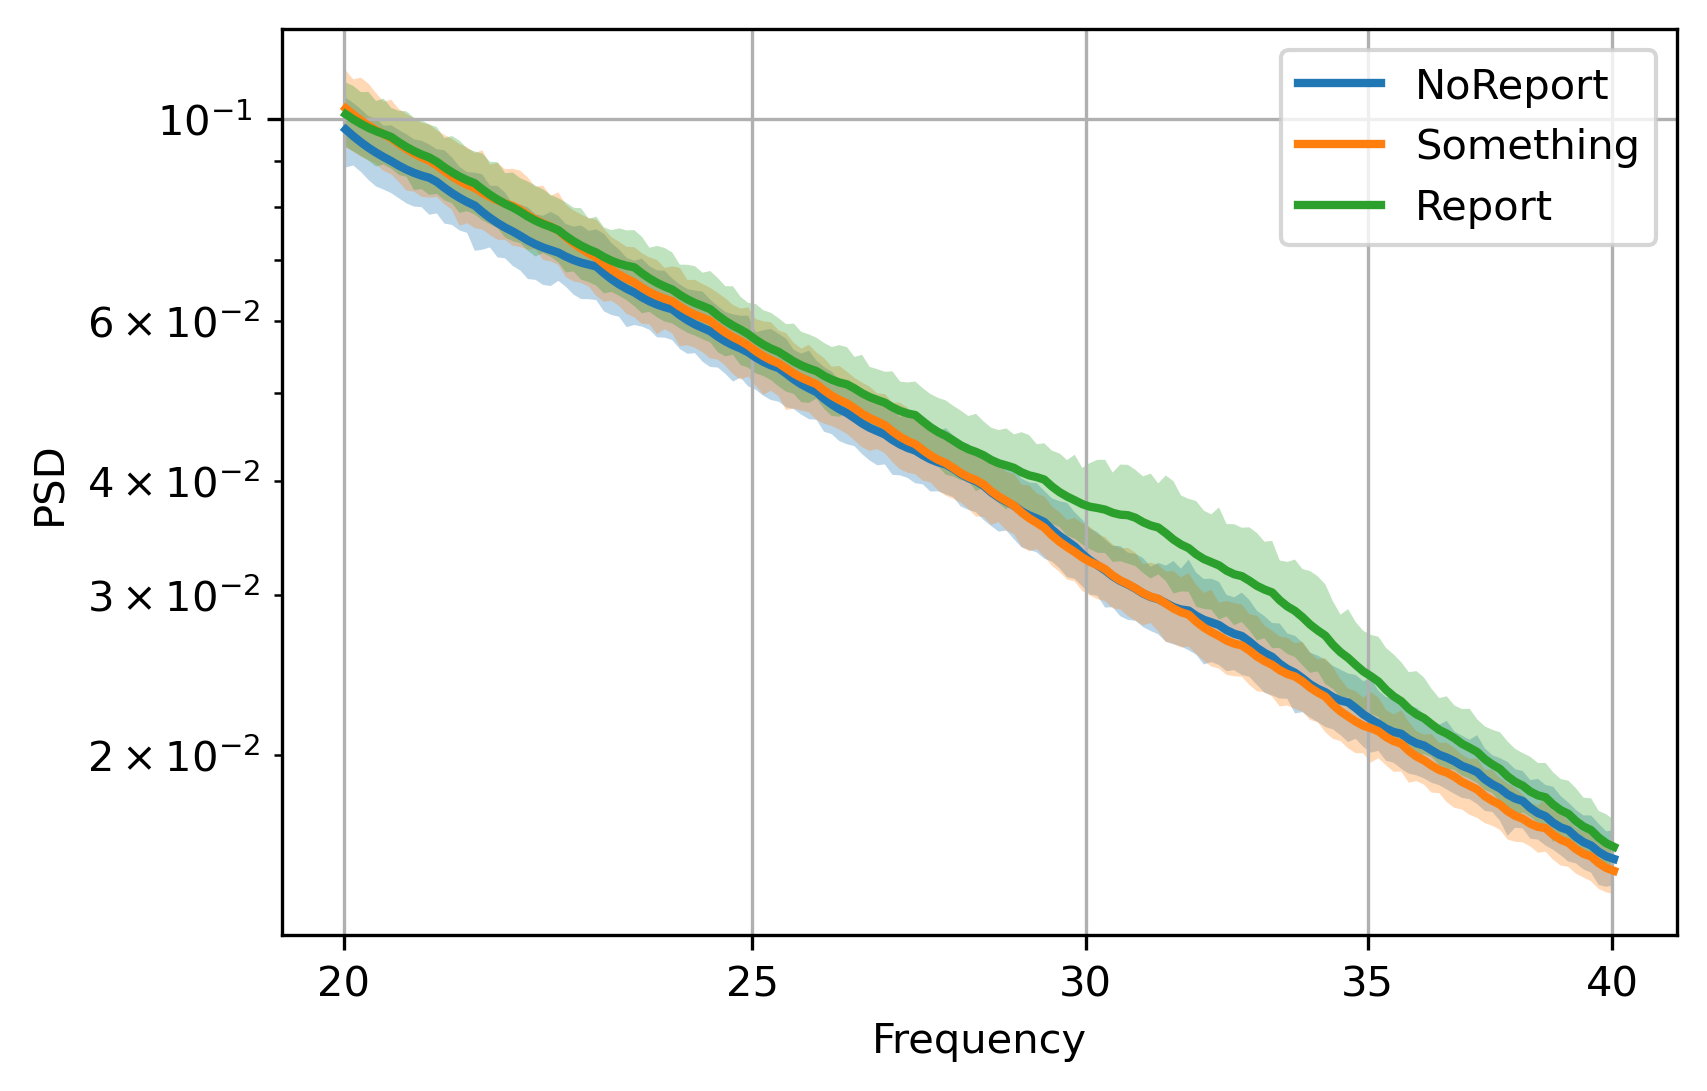

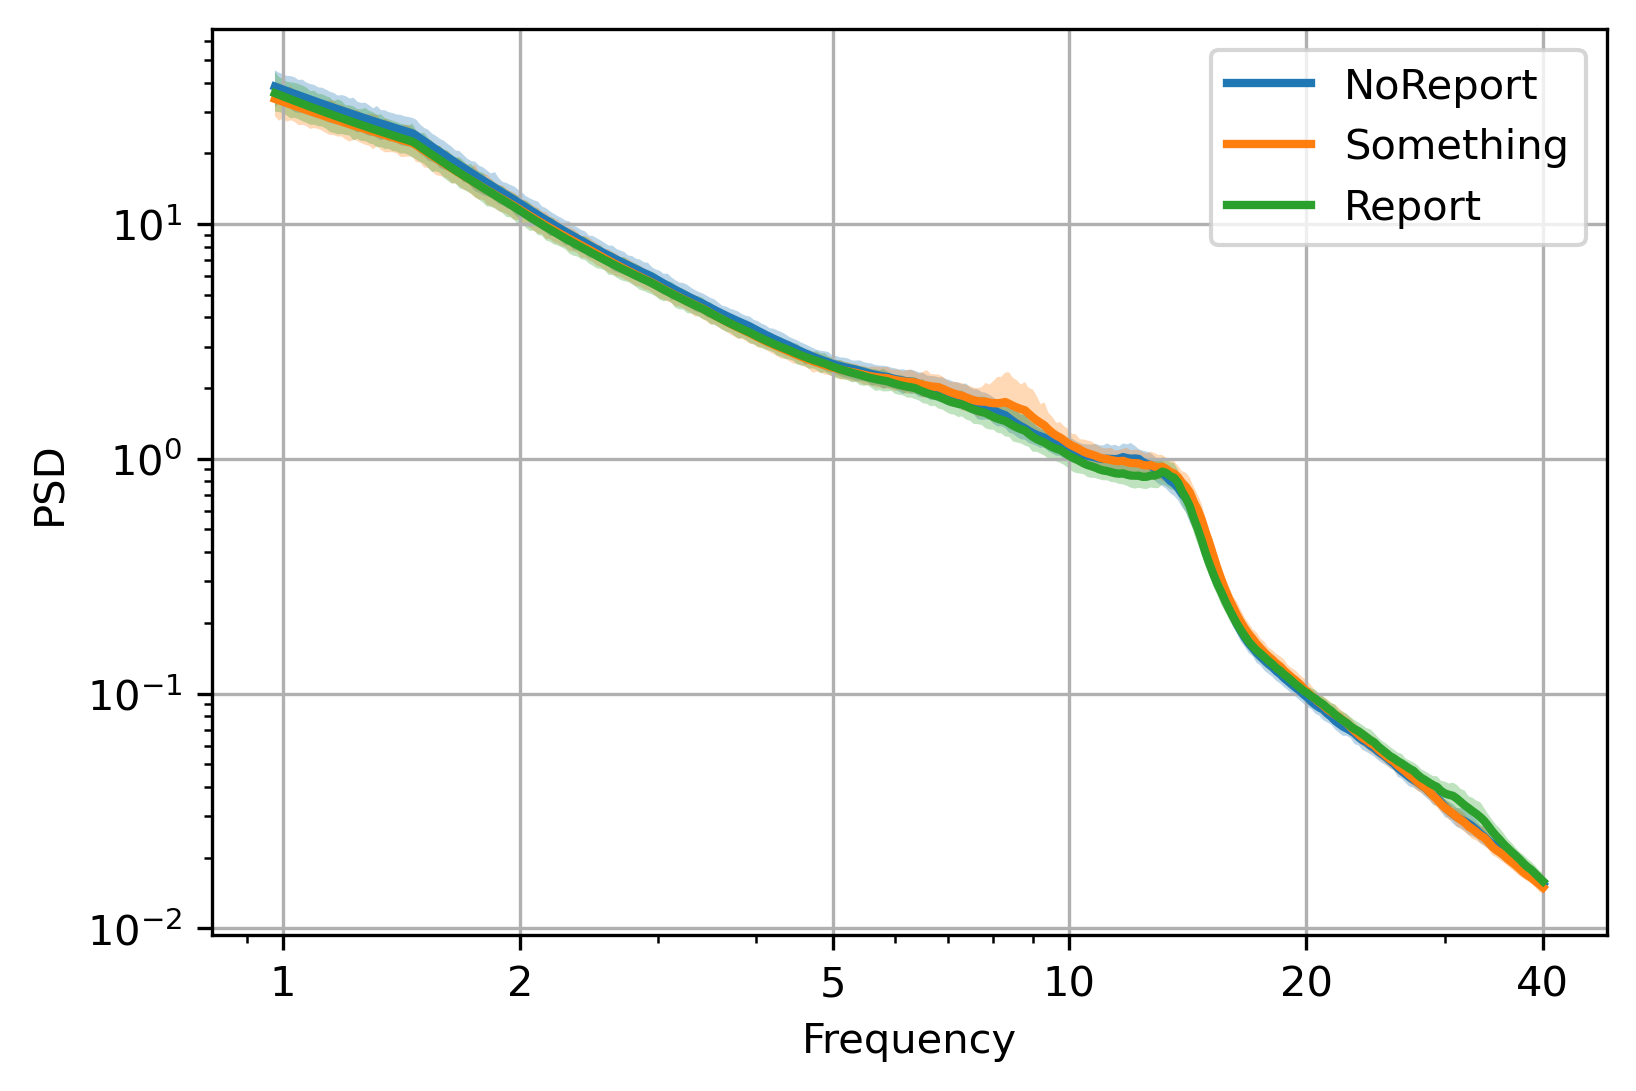

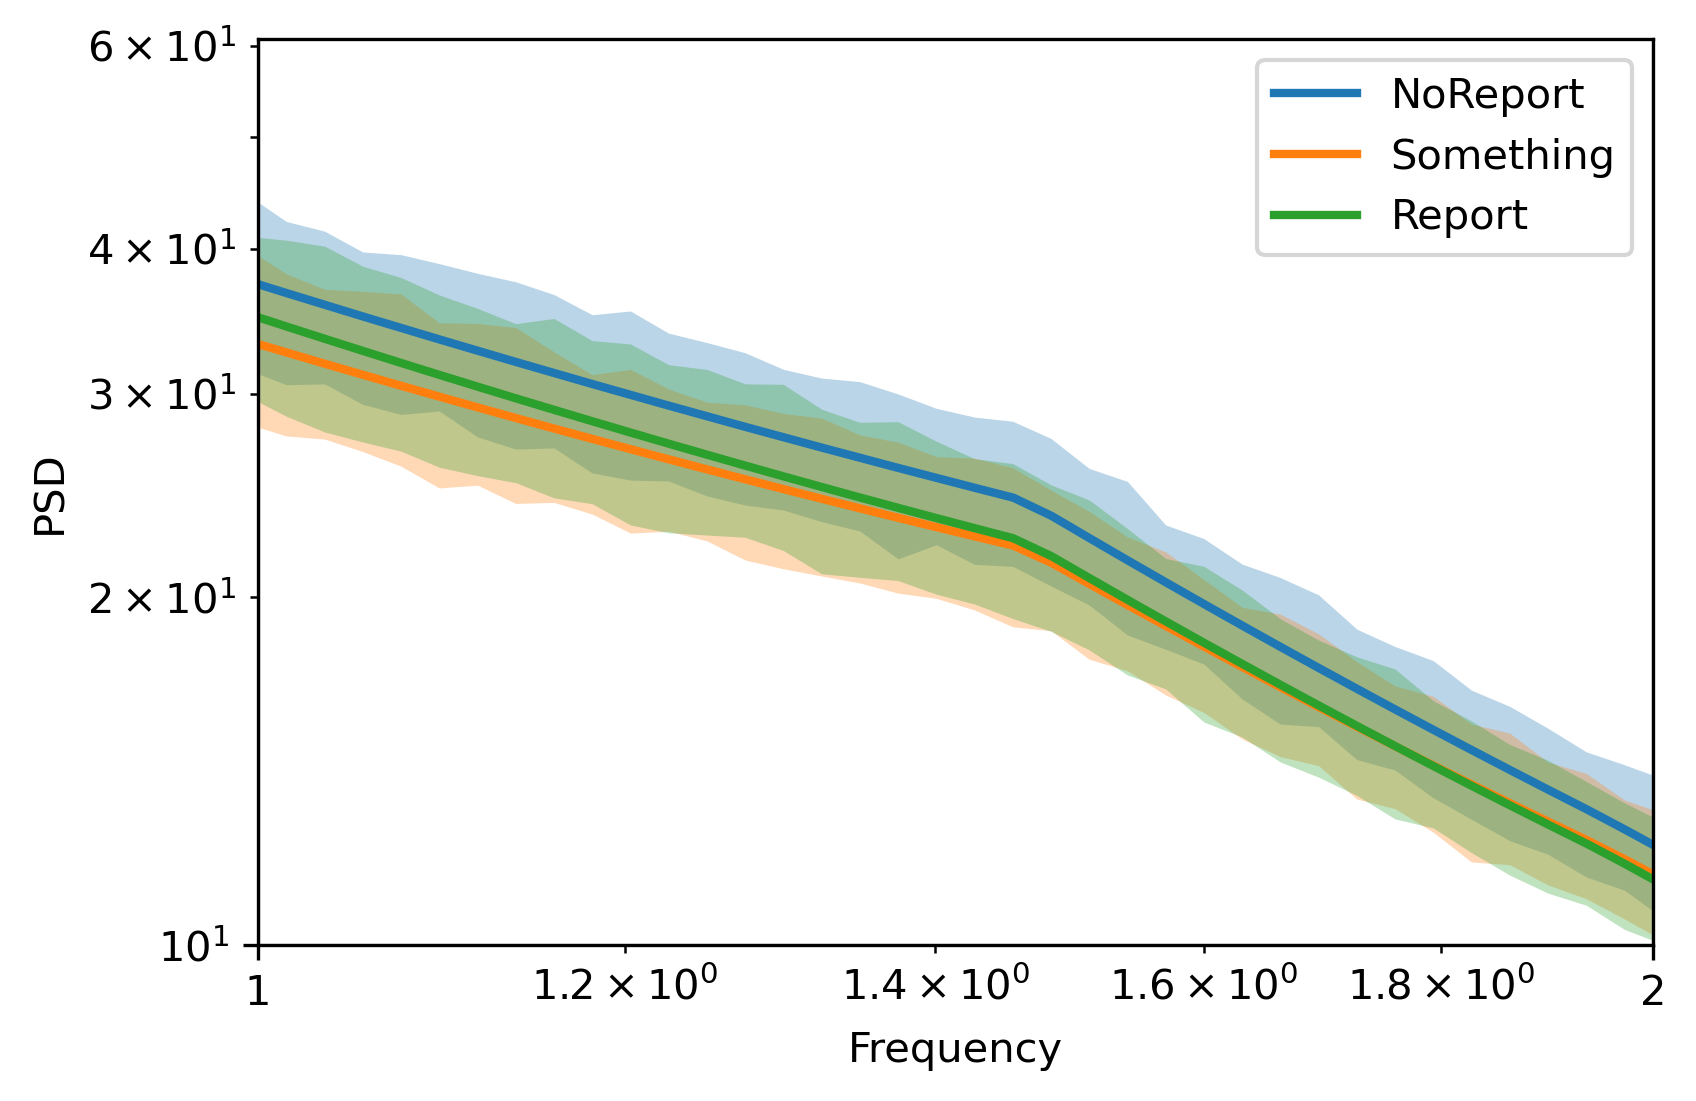

In [118]:
from matplotlib.ticker import ScalarFormatter    
    
for FREQS in ["20-40","1-40","1-20", ]:
# for FREQS in ["1-20", ]:
    
    fig, ax=plt.subplots(dpi=300)
    
    for condition in ["NoReport","Something", "Report"]:
    

        df_nona = nrem_dataframe[(nrem_dataframe[("SPECEXP_" + FREQS)].notna()) &\
                                 (nrem_dataframe["Q1Experience"] == condition) &\
                                 (nrem_dataframe["HOLD_OUT"] == False)].copy()
        df_nona = df_nona.reset_index(drop=True)

        night_average = [];
        for i in range(0,len(df_nona)):
            night_average.append(df_nona.loc[i][("OBS_" + FREQS)])


        night_average = np.array(night_average)
        time_series_df = pd.DataFrame(np.transpose(night_average)) # axis 0 is frequencies, axis 1 is subjects


        #Plotting:
        plt.plot(df_nona.loc[0][("FREQ_" + FREQS)],np.mean(time_series_df,axis=1), 
                 linewidth=2, label=condition) #mean curve.
        
        
        low_i = [] # lower bound bootstrap
        high_i = [] # higher bound bootstrap
        for i in range(0,len(df_nona.loc[0][("FREQ_" + FREQS)])):
            boot_means = []
            for _ in range(500):
                boot_sample = np.random.choice(time_series_df.loc[i],
                                               replace = True, 
                                               size = len(time_series_df.loc[i])) # take a random sample each iteration
                boot_mean = np.mean(boot_sample)# calculate the mean for each iteration
                boot_means.append(boot_mean) # append the mean to boot_means
            
            boot_means_np = np.array(boot_means) # transform it into a numpy array for calculation
            low_i.append(np.percentile(boot_means_np, 0.5)) # 99% C.I.)
            high_i.append(np.percentile(boot_means_np, 99.5))
        
        low_i = np.array(low_i) 
        high_i = np.array(high_i)
            
        plt.fill_between(np.array(df_nona.loc[0][("FREQ_" + FREQS)]), 
                         low_i, 
                         high_i, 
                         alpha=.3) 
        
        plt.xlabel("Frequency")
        plt.ylabel("PSD")

        
    
    ax = plt.gca()
    import matplotlib.ticker as ticker
    ax.set_yscale('log')
    ax.set_xscale('log')
    
    if FREQS == "1-40":
        x = [1, 2, 5, 10, 20, 40] 
        plt.xticks(x,x)
    if FREQS == "1-20":
#         x = [1, 2, 5, 10, 20] 
#         plt.xticks(x,x)
        
        # focus on low frequenices
        x = [1,2]
        plt.xticks(x,x)
        plt.xlim(1,2)
        plt.ylim(10,)
        
    if FREQS == "20-40":
        x = [20, 25, 30, 35, 40] 
        plt.xticks(x,x)

    plt.legend()
    plt.grid(True)
    plt.show()

In [ ]:
from matplotlib.ticker import ScalarFormatter 

nrem_dataframe["REPORT_BINARY"] = "No Experience"
nrem_dataframe.loc[nrem_dataframe[(nrem_dataframe["Q1Experience"] != "NoReport")].index,"REPORT_BINARY"] = "Conscious Experience"

    
for FREQS in ["1-40", "1-20", "20-40", ]:
    
    fig, ax=plt.subplots(dpi=300)
    
    for condition in ["No Experience","Conscious Experience"]:

        df_nona = nrem_dataframe[(nrem_dataframe[("SPECEXP_" + FREQS)].notna()) &\
                                 (nrem_dataframe["Q1Experience"] != "Something") &\
                                 (nrem_dataframe["REPORT_BINARY"] == condition) &\
                                 (nrem_dataframe["HOLD_OUT"] == False)].copy()
        df_nona = df_nona.reset_index(drop=True)

        night_average = []; # across subjects
        for i in range(0,len(df_nona)):
            night_average.append(df_nona.loc[i][("OBS_" + FREQS)])

        night_average = np.array(night_average)
        time_series_df = pd.DataFrame(np.transpose(night_average)) # axis 1 is frequencies, axis 0 is subjects


        #Plotting:
        plt.plot(df_nona.loc[0][("FREQ_" + FREQS)],np.mean(time_series_df,axis=1), 
                 linewidth=1, label=condition) #mean curve.
        
        
        low_i = [] # lower bound bootstrap
        high_i = [] # higher bound bootstrap
        for i in range(0,len(df_nona.loc[0][("FREQ_" + FREQS)])):
            boot_means = []
            for _ in range(200):
                boot_sample = np.random.choice(time_series_df.loc[i],
                                               replace = True, 
                                               size = len(time_series_df.loc[i])) # take a random sample each iteration
                boot_mean = np.mean(boot_sample)# calculate the mean for each iteration
                boot_means.append(boot_mean) # append the mean to boot_means
            
            boot_means_np = np.array(boot_means) # transform it into a numpy array for calculation
            low_i.append(np.percentile(boot_means_np, 0.5)) # 99% C.I.)
            high_i.append(np.percentile(boot_means_np, 99.5))
        
        low_i = np.array(low_i) 
        high_i = np.array(high_i)
            
        plt.fill_between(df_nona.loc[0][("FREQ_" + FREQS)], 
                         low_i, 
                         high_i, 
                         alpha=.3) 
        
        plt.legend(bbox_to_anchor=(1,1), loc="upper right")
        plt.xlabel("Frequency " + FREQS)
        plt.ylabel("PSD")
        
    
    ax = plt.gca()
    import matplotlib.ticker as ticker
    ax.set_yscale('log')
    ax.set_xscale('log')
    
    if FREQS == "1-40":
        print("HI")
        plt.xlim([1,40])
        x = [1, 2, 5, 10, 20, 40] 
        plt.xticks(x,x)
        
    if FREQS == "1-20":
        plt.xlim([1,20])
        x = [1, 2, 5, 10, 20] 
        plt.xticks(x,x)
        
    if FREQS == "20-40":
        x = [20, 25, 30, 35, 40] 
        plt.xticks(x,x)
        plt.xlim([20,40])

    
    plt.show()